<div style="display:block">
    <div style="width: 10%; display: inline-block; text-align: left;">
        <img src="http://upload.wikimedia.org/wikipedia/en/0/0c/Mu_Sigma_Logo.jpg" style="height:75px; margin-left:0px" />
    </div>
    <div style="width: 69%; display: inline-block">
         <h1 style="color:maroon; text-align: center; font-size:25px;">Weather API Exploration</h1>
        <div style="width: 90%; text-align: center; display: inline-block;"><i>Author(s): </i>Gourav Kumar</div>
    </div>
    <div style="width: 20%; text-align: right; display: inline-block;">
        <div style="width: 100%; text-align: left; display: inline-block;">
            <i>Created: Jun 26th, 2020</i>
        </div>
        <div style="width: 100%; text-align: left; display: inline-block;">
            <i>Modified: Jun 29th, 2020</i>
        </div>
    </div>
</div>

In [1]:
import json
import requests
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt 

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.options.display.float_format = '{:.2f}'.format

from IPython.display import display
from IPython.display import HTML
import geopy.distance
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button style="color:"black";right:75%;" onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

<br>

# Weather Source Full Documentation :
### https://developer.weathersource.com/documentation/resources/

<br>

## **Get Points History**

Description : Returns a collection of weather history data for a latitude/longitude point.

Our patented OnPoint™ weather data is not confined to weather station locations, but is computed by overlaying multiple past weather sources (including weather station, satellite, radar, weather balloon, and model data – among others). The resulting quality-checked, error-corrected, gap-filled, and contiguous data is uniquely derived for possible every latitude/longitude location. This resource is globally available, everywhere there is landmass (except Antartica), for 2007 onward.

Requires a subscription plan with the “read_history” and “access_points” capabilities to access this resource.

Resource URL : https://api.weathersource.com/v1/{{api_key}}/points/{{latitude}},{{longitude}}/history.{{format}}

Documentation Used : https://developer.weathersource.com/documentation/resources/get-points-latitude_and_longitude-history/

In [2]:
def ws_historical_data(start, end, lat, long, period='day', fields='all'):
    '''
    If duration is more than 1 year separate calls should be used
    Timestamp should be converted to ISO 8601 format
    Docstring with examples and function return values:
    
    Input :
    start - (%Y-%m-%d) format
    end - (%Y-%m-%d) format
    lat - latitude 
    long - longitude
    period - hour, day (default=day)
    
    Output : return a callection of weather historical data for a latitude/longitude point
    
    '''
    key = 'e721181f854ac2268ee8'
    start = pd.to_datetime(start,format='%Y-%m-%d')
    end = pd.to_datetime(end, format='%Y-%m-%d')
    
    start = start.strftime('%Y-%m-%dT%H:%M:%S')
    end = end.strftime('%Y-%m-%dT%H:%M:%S')
    
    weather_ = pd.DataFrame()
    link = 'https://api.weathersource.com/v1/'+key+'/points/'+lat+','+long+'/history.json?period='+period+'&timestamp_between='+start+','+end+'&fields='+fields
    print(link)
    response = requests.get(link)
    json_obj = json.loads(response.content.decode('utf-8'))
    weather_ = json_normalize(json_obj)
    
    return weather_

In [3]:
start_time = "2020-06-09"
end_time = "2020-06-15"
location = ('39.9613', '-86.4034')

data = ws_historical_data(start=start_time, end=end_time, lat=location[0], long=location[1], period='hour')
data.head()

https://api.weathersource.com/v1/e721181f854ac2268ee8/points/39.9613,-86.4034/history.json?period=hour&timestamp_between=2020-06-09T00:00:00,2020-06-15T00:00:00&fields=all


,cldCvr,dewPt,feelsLike,heatIndex,latitude,longitude,mslPres,precip,presTend,radSolar,relHum,sfcPres,snowfall,spcHum,temp,timestamp,wetBulb,windChill,windDir,windDir100m,windDir80m,windSpd,windSpd100m,windSpd80m
0,97,53.50,73.40,73.40,39.96,-86.40,1010.10,0.00,-0.20,0.00,49.50,978.40,0,9.10,73.40,2020-06-09T00:00:00-04:00,61.80,73.40,123.00,128.10,124.20,7.80,21.00,20.20
1,100,54.40,72.20,72.20,39.96,-86.40,1009.20,0.00,-0.30,0.00,53.80,978.10,0,9.40,72.20,2020-06-09T01:00:00-04:00,61.60,72.20,119.10,128.00,123.20,8.50,21.40,21.10
2,100,55.80,71.50,71.50,39.96,-86.40,1009.20,0.00,-0.30,0.00,57.50,977.80,0,9.80,71.50,2020-06-09T02:00:00-04:00,62.00,71.50,127.50,131.20,128.30,8.60,23.20,22.70
3,100,56.90,71.60,71.60,39.96,-86.40,1009.60,0.00,-1.00,0.00,60.00,976.80,0,10.20,71.60,2020-06-09T03:00:00-04:00,62.60,71.60,125.10,135.10,130.70,8.30,23.50,22.50
4,100,56.70,71.40,71.40,39.96,-86.40,1008.30,0.00,-0.40,0.00,60.00,976.40,0,10.20,71.40,2020-06-09T04:00:00-04:00,62.40,71.40,137.90,139.00,135.50,9.60,21.60,21.70


In [4]:
start_time = "2020-06-09"
end_time = "2020-06-15"
location = ('39.9613', '-86.4034')

data = ws_historical_data(start=start_time, end=end_time, lat=location[0], long=location[0], period='day')
data.head()

https://api.weathersource.com/v1/e721181f854ac2268ee8/points/39.9613,39.9613/history.json?period=day&timestamp_between=2020-06-09T00:00:00,2020-06-15T00:00:00&fields=all


,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,latitude,longitude,mslPresAvg,mslPresMax,mslPresMin,precip,presTendAvg,presTendMax,presTendMin,radSolarAvg,radSolarMax,radSolarMin,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowDepth,snowfall,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,timestamp,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin
0,48,99,6,40.00,45.40,35.90,62.30,80.50,43.30,62.40,80.50,44.40,39.96,39.96,1011.80,1013.80,1010.30,0,0.00,0.50,-0.50,290.70,1003.40,0,6976.10,48.30,87.90,23.00,812.90,814.50,812.00,0,0,6.60,8.10,5.50,62.40,80.50,44.40,2020-06-09T00:00:00+03:00,50.80,59.20,42.30,62.30,80.50,43.30,217,218,243,3.20,5.60,0.80,2.90,5.10,0.80,2.30,3.70,0.60
1,16,39,0,40.00,44.30,36.40,64.30,81.60,43.00,64.70,81.60,44.40,39.96,39.96,1010.30,1013.80,1007.50,0,-0.10,0.40,-0.50,364.80,1003.00,0,8755.20,45.30,89.10,23.20,812.40,814.20,810.40,0,0,6.60,7.60,5.60,64.70,81.60,44.40,2020-06-10T00:00:00+03:00,51.80,60.00,42.70,64.30,81.60,43.00,114,113,105,5.00,10.70,1.10,4.60,9.70,1.00,3.50,6.40,0.70
2,3,8,0,34.30,40.50,28.80,59.90,74.20,44.40,60.60,74.20,44.50,39.96,39.96,1007.20,1010.10,1005.10,0,-0.10,0.30,-0.50,380.20,1041.40,0,9126.10,40.90,67.30,21.60,808.90,811.00,807.10,0,0,5.30,6.70,4.20,60.60,74.20,44.50,2020-06-11T00:00:00+03:00,48.30,55.10,38.00,59.90,74.20,44.40,150,150,149,11.20,17.80,2.90,10.30,16.70,2.50,7.30,12.80,1.50
3,29,99,0,36.90,45.40,29.50,56.90,72.20,37.70,57.20,72.20,38.90,39.96,39.96,1006.60,1007.90,1005.70,0,0.00,0.50,-0.60,322.30,958.30,0,7733.60,52.10,90.30,25.00,807.20,807.80,806.70,0,0,5.90,8.10,4.30,57.20,72.20,38.90,2020-06-12T00:00:00+03:00,47.30,54.30,36.60,56.90,72.20,37.70,199,201,214,5.20,8.30,1.80,4.80,7.80,1.50,3.40,6.40,0.80
4,22,91,0,38.20,41.50,35.50,56.30,69.30,42.60,56.80,69.30,43.60,39.96,39.96,1006.60,1009.40,1004.80,0,0.00,0.50,-0.30,377.20,1036.20,0,9052.00,53.90,90.10,29.40,806.50,807.80,805.80,0,0,6.10,6.90,5.60,56.80,69.30,43.60,2020-06-13T00:00:00+03:00,47.50,53.00,40.70,56.30,69.30,42.60,166,166,164,10.00,16.40,3.60,9.40,15.80,3.20,6.40,12.00,1.80


## **Get Points Forecast**

Description : Returns up to 15 days of daily weather forecast data or 240 hours of hourly weather forecast data for a latitude/longitude point.

Our patented OnPoint™ system uniquely derives contiguous data for every possible latitude/longitude location. This resource is globally available, everywhere there is landmass (except Antartica).

Requires a subscription plan with the “read_forecast” and “access_points” capabilities to access this resource.

Resource Url : https://api.weathersource.com/v1/{{api_key}}/points/{{latitude}},{{longitude}}/forecast.{{format}}

Documentation Used : https://developer.weathersource.com/documentation/resources/get-points-latitude_and_longitude-forecast/

In [5]:
def ws_forecast_data(start, end, lat, long, period='day', fields='all'):
    '''
    Timestamp should be converted to ISO 8601 format
    Docstring with examples and function return values:
    
    Input :
    start - (%Y-%m-%d) format
    end - (%Y-%m-%d) format
    lat - latitude 
    long - longitude
    period - hour, day (default=day)
    
    Output : returns forecast data upto 15 days ahead of forecast data and 240 hours of hourly weather data for a latitude/longitude point
    
    '''
    key = 'e721181f854ac2268ee8'
    start = pd.to_datetime(start,format='%Y-%m-%d')
    end = pd.to_datetime(end, format='%Y-%m-%d')
    
    start = start.strftime('%Y-%m-%dT%H:%M:%S')
    end = end.strftime('%Y-%m-%dT%H:%M:%S')
    
    weather_ = pd.DataFrame()
    link = 'https://api.weathersource.com/v1/'+key+'/points/'+lat+','+long+'/forecast.json?period='+period+'&timestamp_between='+start+','+end+'&fields='+fields
    response = requests.get(link)
    json_obj = json.loads(response.content.decode('utf-8'))
    weather_ = json_normalize(json_obj)
    
    return weather_

In [6]:
start_time = "2020-06-23"
end_time = "2020-06-30"
location = ('39.9613', '-86.4034')

data = ws_forecast_data(start=start_time, end=end_time, lat=location[0], long=location[1], period='day')
data.head()

,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,latitude,longitude,mslPresAvg,mslPresMax,mslPresMin,precip,precipProb,radSolarAvg,radSolarMax,radSolarMin,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowfall,snowfallProb,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,timestamp,timestampInit,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin
0,93,100,78,70.90,73.00,68.80,85.00,92.00,76.90,85.00,92.00,76.90,39.96,-86.40,1012.20,1013.40,1011.20,0.46,62,308.90,649.50,8,3398.00,74.40,86.90,58.00,980.10,981.20,979.00,0,0,16.70,18.00,15.50,80.30,87.40,72.90,2020-06-29T00:00:00-04:00,2020-06-29T14:00:00-04:00,73.60,75.80,70.10,80.30,86.80,72.90,248,247,251,5.40,14.20,0.50,5.20,13.40,0.50,3.50,7.00,1.10
1,91,100,68,67.80,70.80,65.40,80.40,89.20,72.10,80.40,89.20,72.10,39.96,-86.40,1011.70,1013.10,1009.60,0.29,95,294.50,889.70,0,7067.30,74.70,88.80,57.90,979.50,980.80,977.70,0,0,15.00,16.70,13.80,76.80,85.60,69.80,2020-06-30T00:00:00-04:00,2020-06-29T14:00:00-04:00,70.60,74.20,67.20,76.80,85.00,69.90,194,193,201,7.60,11.90,1.40,7.20,11.20,1.30,4.80,7.70,0.90


In [7]:
start_time = "2020-06-23"
end_time = "2020-06-30"
location = ('39.9613', '-86.4034')

data = ws_forecast_data(start=start_time, end=end_time, lat=location[0], long=location[1], period='hour')
data.head()

,cldCvr,dewPt,feelsLike,heatIndex,latitude,longitude,mslPres,precip,precipProb,radSolar,relHum,sfcPres,snowfall,snowfallProb,spcHum,temp,timestamp,timestampInit,wetBulb,windChill,windDir,windDir100m,windDir80m,windSpd,windSpd100m,windSpd80m
0,84,72.20,89.90,89.90,39.96,-86.40,1011.30,0.07,nan,580.10,67.30,979.30,0,nan,17.50,84.10,2020-06-29T18:00:00-04:00,2020-06-29T14:00:00-04:00,75.60,84.10,298.50,309.20,309.40,3.30,2.50,2.50
1,87,73.00,88.30,88.30,39.96,-86.40,1011.60,0.07,nan,504.80,73.20,979.50,0,nan,18.00,82.40,2020-06-29T19:00:00-04:00,2020-06-29T14:00:00-04:00,75.60,82.40,285.00,280.20,279.50,2.70,3.00,3.00
2,89,72.00,84.30,84.30,39.96,-86.40,1012.50,0.01,60.00,431.50,77.70,980.30,0,0.00,17.30,79.70,2020-06-29T20:00:00-04:00,2020-06-29T14:00:00-04:00,74.20,79.70,255.60,253.90,252.90,3.00,4.30,4.20
3,100,71.40,81.30,81.30,39.96,-86.40,1012.80,0.07,nan,40.00,82.20,980.50,0,nan,16.90,77.30,2020-06-29T21:00:00-04:00,2020-06-29T14:00:00-04:00,73.10,77.30,245.50,242.10,242.90,5.10,9.40,9.90
4,100,69.80,79.10,79.10,39.96,-86.40,1012.50,0.05,nan,20.00,82.60,980.10,0,nan,16.00,75.50,2020-06-29T22:00:00-04:00,2020-06-29T14:00:00-04:00,71.50,75.50,254.80,254.90,254.30,7.00,14.20,13.40


#  Dark - sky : https://darksky.net/dev/docs

In [8]:
# import required packages
from google.cloud import storage
import os
import subprocess
import pandas as pd
import numpy as np
import re #regukar expression
from datetime import datetime
import ast #abstract syntax tree
import warnings
import pytz #date-time conversion
import requests #to get info from server
import time
import datetime as dt
import json
from pandas.io.json import json_normalize
from datetime import date, timedelta
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  #ignores the warning message and code runs faster # default='warn'

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.options.display.float_format = '{:.2f}'.format

## **Get Daily Data**

In [9]:
def getdarkskydatadaily(start,end,loc_name):
    """
    
    Input - start_date, end_date, API KEY from https://darksky.net/dev/register (now closed APPLE has acqired darksky)
    Output -daily level weather data from start date to end date for specified location
    
    """
    #api_key = '12ea26d5539f1add37b448b7db20f6b8'
    api_key ='03f7d7221972645470c7e8c6f35edd85'
    headers = {'User-Agent': 'Chrome/78and.0.3865.90'}
    http_proxy  = "http://10.245.5.249:8080"
    https_proxy = "https://10.245.5.249:8080"
    ftp_proxy   = "ftp://10.245.5.249:8080"

    proxyDict = { 
                "http"  : http_proxy, 
                "https" : https_proxy, 
                "ftp"   : ftp_proxy
                 }
    
    weather_data_daily = pd.DataFrame()
    date_list = []
    
    # get month,year and day from start date
    start_date = dt.datetime.strptime(start, "%Y-%m-%d")
    start_month = start_date.month
    start_year = start_date.year
    start_day = start_date.day
    
    # get month,year and day from end date
    end_date = dt.datetime.strptime(end, "%Y-%m-%d")
    end_month = end_date.month
    end_year = end_date.year
    end_day = end_date.day
    
    # store all date from start date to end date in date list 
    start_date = date(start_year, start_month, start_day)
    end_date = date(end_year, end_month, end_day)
    delta = timedelta(days=1)
    
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += delta
    
    # latitude of the location markers
    sites_latitude = {
        'Marker 1' : '39.9613','Marker 2' : '39.8971','Marker 3' : '39.9060','Marker 4' : '39.9024','Marker 5' : '39.8960','Marker 6' : '39.8339',
        'Marker 7' : '39.8412','Marker 8' : '39.8381','Marker 9' : '39.8386','Marker 10' : '39.7579','Marker 11' : '39.7621','Marker 12' : '39.7621',
        'Marker 13' : '39.7695','Marker 14' : '39.6617','Marker 15' : '39.6639','Marker 16' : '39.6702','Marker 17' : '39.6744','Marker 18' : '39.5909',
        'Marker 19' : '39.5295','Marker 20' : '39.5475'
    }
    
    # longitude of the location markers
    sites_longitude = {
        'Marker 1' : '-86.4034','Marker 2' : '-86.3045','Marker 3' : '-86.2001','Marker 4' : '-86.0738','Marker 5' : '-85.9783','Marker 6' : '-86.3155',
        'Marker 7' : '-86.2056','Marker 8' : '-86.0985','Marker 9' : '-85.9811','Marker 10' : '-86.3155','Marker 11' : '-86.2042','Marker 12' : '-86.0923',
        'Marker 13' : '-85.9708','Marker 14' : '-86.2935','Marker 15' : '-86.1823','Marker 16' : '-86.0669','Marker 17' : '-85.9557','Marker 18' : '-86.4212',
        'Marker 19' : '-86.5874','Marker 20' : '-86.2743'
    }
    
    value1 = sites_latitude.get(loc_name)
    value2 = sites_longitude.get(loc_name)
    if(value1 == None and value2 == None):
        print('Unknown Location Name Used: %s',loc_name)
        print('\n')
        print('Use some other Consumer Location or Generation Location Name.. .. ..')
        print('\n')
    else :
        for i in range(len(date_list)):
            #requesting web page
            date_format = '%Y-%m-%dT%H:%M:%S'
            dates = dt.datetime.strptime(date_list[i], '%Y-%m-%d').strftime(date_format)
            links = 'https://api.darksky.net/forecast/'+api_key+'/'+sites_latitude.get(loc_name)+','+sites_longitude.get(loc_name)+','+str(dates)+'?exclude=currently,hourly,alerts?units=us'
            print(links)
            response = requests.get(links,headers=headers,proxies=proxyDict)

            # converting into json
            weather = json.loads(response.content.decode('utf-8'))
            # getting it into data frame
            weather_data = json_normalize(weather['daily']['data'])
            weather_data_daily = weather_data_daily.append(weather_data,sort=True)
    
    weather_data_daily.reset_index(drop=True, inplace=True)
    
    return weather_data_daily

## **Get Hourly Data**

In [10]:
def getdarkskydatahourly(start,end,loc_name):
    """
    
    Input - start_date, end_date, API KEY from https://darksky.net/dev/register (now closed APPLE has acqired darksky)
    Output - hourly level weather data from start date to end date for specified location
    
    """
    api_key = '12ea26d5539f1add37b448b7db20f6b8'
    
    headers = {'User-Agent': 'Chrome/78and.0.3865.90'}
    http_proxy  = "http://10.245.5.249:8080"
    https_proxy = "https://10.245.5.249:8080"
    ftp_proxy   = "ftp://10.245.5.249:8080"

    proxyDict = { 
                "http"  : http_proxy, 
                "https" : https_proxy, 
                "ftp"   : ftp_proxy
                 }
    
    weather_data_hourly = pd.DataFrame()
    date_list = []
    
    # get month,year and day from start date
    start_date = dt.datetime.strptime(start, "%Y-%m-%d")
    start_month = start_date.month
    start_year = start_date.year
    start_day = start_date.day
    
    # get month,year and day from end date
    end_date = dt.datetime.strptime(end, "%Y-%m-%d")
    end_month = end_date.month
    end_year = end_date.year
    end_day = end_date.day
    
    # store all date from start date to end date in date list 
    start_date = date(start_year, start_month, start_day)
    end_date = date(end_year, end_month, end_day)
    delta = timedelta(days=1)
    
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += delta
    
    # latitude of the location markers
    sites_latitude = {
        'Marker 1' : '39.9613','Marker 2' : '39.8971','Marker 3' : '39.9060','Marker 4' : '39.9024','Marker 5' : '39.8960','Marker 6' : '39.8339',
        'Marker 7' : '39.8412','Marker 8' : '39.8381','Marker 9' : '39.8386','Marker 10' : '39.7579','Marker 11' : '39.7621','Marker 12' : '39.7621',
        'Marker 13' : '39.7695','Marker 14' : '39.6617','Marker 15' : '39.6639','Marker 16' : '39.6702','Marker 17' : '39.6744','Marker 18' : '39.5909',
        'Marker 19' : '39.5295','Marker 20' : '39.5475'
    }
    
    # longitude of the location markers
    sites_longitude = {
        'Marker 1' : '-86.4034','Marker 2' : '-86.3045','Marker 3' : '-86.2001','Marker 4' : '-86.0738','Marker 5' : '-85.9783','Marker 6' : '-86.3155',
        'Marker 7' : '-86.2056','Marker 8' : '-86.0985','Marker 9' : '-85.9811','Marker 10' : '-86.3155','Marker 11' : '-86.2042','Marker 12' : '-86.0923',
        'Marker 13' : '-85.9708','Marker 14' : '-86.2935','Marker 15' : '-86.1823','Marker 16' : '-86.0669','Marker 17' : '-85.9557','Marker 18' : '-86.4212',
        'Marker 19' : '-86.5874','Marker 20' : '-86.2743'
    }
    
    value1 = sites_latitude.get(loc_name)
    value2 = sites_longitude.get(loc_name)
    if(value1 == None and value2 == None):
        print('Unknown Location Name Used: %s',loc_name)
        print('\n')
        print('Use some other Consumer Location or Generation Location Name.. .. ..')
        print('\n')
    else :
        for i in range(len(date_list)):
            #requesting web page
            date_format = '%Y-%m-%dT%H:%M:%S'
            dates = dt.datetime.strptime(date_list[i], '%Y-%m-%d').strftime(date_format)
            links = 'https://api.darksky.net/forecast/'+api_key+'/'+sites_latitude.get(loc_name)+','+sites_longitude.get(loc_name)+','+str(dates)+'?exclude=currently,daily,alerts?units=us'
            print(links)
            response = requests.get(links,headers=headers,proxies=proxyDict)

            # converting into json
            weather = json.loads(response.content.decode('utf-8'))
            # getting it into data frame
            weather_data = json_normalize(weather['hourly']['data'])
            weather_data_hourly = weather_data_hourly.append(weather_data,sort=True)
    
    weather_data_hourly.reset_index(drop=True, inplace=True)
    
    return weather_data_hourly

# **Darksky vs Weather Source (Comparison Plots)**

## **Actual Daily Data**

In [11]:
start_date = "2020-06-01"
end_date = "2020-06-20"
location = ('39.9613', '-86.4034')
location_marker = 'Marker 1'

weathersource_data = ws_historical_data(start=start_date, end=end_date, lat=location[0], long=location[0], period='day')
darksky_data = getdarkskydatadaily(start_date,end_date,location_marker)

https://api.weathersource.com/v1/e721181f854ac2268ee8/points/39.9613,39.9613/history.json?period=day&timestamp_between=2020-06-01T00:00:00,2020-06-20T00:00:00&fields=all
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/39.9613,-86.4034,2020-06-01T00:00:00?exclude=currently,hourly,alerts?units=us
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/39.9613,-86.4034,2020-06-02T00:00:00?exclude=currently,hourly,alerts?units=us
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/39.9613,-86.4034,2020-06-03T00:00:00?exclude=currently,hourly,alerts?units=us
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/39.9613,-86.4034,2020-06-04T00:00:00?exclude=currently,hourly,alerts?units=us
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/39.9613,-86.4034,2020-06-05T00:00:00?exclude=currently,hourly,alerts?units=us
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/39.9613,-86.4034,2020-06-06T00:00:00?exclude

In [12]:
weathersource_data['date_time'] = pd.to_datetime(weathersource_data['timestamp'])
weathersource_data['Date'] = weathersource_data['date_time'].dt.date

########################################################################################################################################################################################################################
########################################################################################################################################################################################################################

darksky_data['date_time'] = pd.to_datetime(darksky_data['time'],unit='s')
darksky_data['date_time']=darksky_data['date_time'].astype(str)
 
#shift data from gmt to est time
def date_convert(date):
    date = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    my_timestamp = date # some timestamp
    old_timezone = pytz.timezone("GMT")
    new_timezone = pytz.timezone("US/Eastern")

    # returns datetime in the new timezone
    my_timestamp_in_new_timezone = old_timezone.localize(my_timestamp).astimezone(new_timezone)
    return pd.to_datetime(my_timestamp_in_new_timezone)
 
darksky_data['date_time'] = darksky_data.apply(lambda x: date_convert(x['date_time']),axis=1)
darksky_data['Date'] = darksky_data['date_time'].dt.date


In [13]:
print('\n')
print('\n')
display(weathersource_data.head())
print('\n')
print('\n')
print('\n')
print('\n')
display(darksky_data.head())

,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,latitude,longitude,mslPresAvg,mslPresMax,mslPresMin,precip,presTendAvg,presTendMax,presTendMin,radSolarAvg,radSolarMax,radSolarMin,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowDepth,snowfall,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,timestamp,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin,date_time,Date
0,24,80,1,34.30,40.00,29.00,51.10,64.90,33.70,52.50,64.90,36.70,39.96,39.96,1011.00,1013.70,1009.40,0.00,-0.10,0.40,-0.80,367.90,1033.80,0,8828.30,52.50,75.90,32.50,810.30,811.70,809.20,0,0,5.20,6.50,4.20,52.50,64.90,36.70,2020-06-01T00:00:00+03:00,43.80,50.60,33.70,51.10,64.90,33.70,167,166,163,10.40,17.10,5.90,9.60,16.00,5.40,6.90,12.40,3.70,2020-06-01 00:00:00+03:00,2020-06-01
1,29,84,2,35.70,38.40,31.10,52.50,66.60,36.00,53.60,66.60,39.00,39.96,39.96,1007.40,1009.70,1004.50,0.00,-0.10,0.70,-0.70,367.60,1030.30,0,8822.20,53.80,87.80,31.50,807.10,808.70,805.20,0,0,5.60,6.10,4.60,53.60,66.60,39.00,2020-06-02T00:00:00+03:00,44.90,51.60,36.50,52.50,66.60,36.00,169,168,166,10.20,16.30,5.10,9.40,16.10,4.40,6.40,10.50,2.50,2020-06-02 00:00:00+03:00,2020-06-02
2,39,91,3,33.50,41.20,28.50,51.90,66.20,38.60,52.70,66.20,39.70,39.96,39.96,1008.60,1012.30,1007.30,0.00,0.10,0.60,-0.70,365.40,1034.20,0,8769.90,51.80,89.60,27.20,807.30,810.10,805.80,0,0,5.10,6.80,4.10,52.70,66.20,39.70,2020-06-03T00:00:00+03:00,43.80,50.50,36.00,51.90,66.20,38.60,174,173,172,9.00,18.80,1.50,8.40,17.70,1.30,5.90,12.70,0.90,2020-06-03 00:00:00+03:00,2020-06-03
3,6,15,2,34.70,39.70,28.70,49.90,64.00,33.10,51.30,64.00,36.90,39.96,39.96,1013.00,1018.10,1011.20,0.00,0.20,0.70,-0.40,376.00,1033.90,0,9024.50,55.80,91.10,35.70,811.00,814.50,809.50,0,0,5.30,6.40,4.10,51.30,64.00,36.90,2020-06-04T00:00:00+03:00,43.30,50.50,33.60,49.90,64.00,33.10,169,168,165,9.90,15.80,2.90,9.20,15.00,2.60,6.90,11.90,1.90,2020-06-04 00:00:00+03:00,2020-06-04
4,8,19,0,36.50,41.50,32.30,52.60,68.10,33.90,52.90,68.10,35.10,39.96,39.96,1018.60,1020.50,1017.40,0.00,0.10,0.60,-0.60,374.90,1035.80,0,8997.50,60.20,93.90,28.10,815.60,817.90,813.80,0,0,5.70,6.80,4.80,52.90,68.10,35.10,2020-06-05T00:00:00+03:00,45.00,52.20,34.30,52.60,68.10,33.90,289,290,297,3.70,6.80,0.80,3.50,6.50,0.80,3.00,5.50,0.80,2020-06-05 00:00:00+03:00,2020-06-05


,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,cloudCover,dewPoint,humidity,icon,moonPhase,ozone,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,pressure,summary,sunriseTime,sunsetTime,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed,date_time,Date
0,75.16,1591041000,60.41,1591091160,75.16,1591041000,47.54,1591008120,0.17,47.94,0.61,clear-day,0.36,314.80,0.00,0.00,1591063440,0.07,rain,1024.10,Clear throughout the day.,1591006800,1591060200,75.66,1591041000,59.92,1591091160,75.66,1591041000,48.67,1591007220,1590984000,9,1591033800,10.00,169,16.24,1591066800,5.81,2020-06-01 00:00:00-04:00,2020-06-01
1,88.29,1591127460,67.76,1591177620,88.29,1591127460,60.41,1591091160,0.12,58.07,0.57,clear-day,0.40,311.00,0.00,0.00,1591146120,0.05,rain,1015.40,Clear throughout the day.,1591093200,1591146660,88.04,1591128120,66.71,1591177620,88.04,1591128120,59.92,1591091160,1591070400,10,1591120200,10.00,232,29.93,1591103400,11.96,2020-06-02 00:00:00-04:00,2020-06-02
2,91.55,1591207440,66.63,1591264320,91.55,1591207440,67.76,1591177620,0.47,67.28,0.73,rain,0.43,308.90,0.01,0.04,1591228620,0.33,rain,1010.70,Possible light rain overnight.,1591179540,1591233060,87.36,1591207800,64.99,1591264080,87.36,1591207800,66.71,1591177620,1591156800,8,1591203420,10.00,249,25.52,1591164060,8.91,2020-06-03 00:00:00-04:00,2020-06-03
3,85.61,1591300200,67.20,1591350480,85.61,1591300200,66.63,1591264320,0.81,68.34,0.84,rain,0.47,314.10,0.02,0.26,1591264740,0.81,rain,1009.10,Heavy rain in the morning and afternoon.,1591265940,1591319520,83.03,1591300500,65.53,1591350600,83.03,1591300500,64.99,1591264080,1591243200,6,1591290180,10.00,250,16.71,1591250580,5.62,2020-06-04 00:00:00-04:00,2020-06-04
4,88.51,1591386540,68.52,1591437180,88.51,1591386540,67.20,1591350480,0.42,68.15,0.79,partly-cloudy-day,0.51,307.20,0.00,0.00,1591350600,0.09,rain,1011.60,Partly cloudy throughout the day.,1591352340,1591405980,86.02,1591386840,66.78,1591437240,86.02,1591386840,65.53,1591350600,1591329600,8,1591375200,9.84,257,12.52,1591401120,5.52,2020-06-05 00:00:00-04:00,2020-06-05


In [14]:
weathersource_data.drop(['date_time'],axis=1,inplace=True)
darksky_data.drop(['date_time'],axis=1,inplace=True)

In [15]:
merged_data = pd.merge(weathersource_data,darksky_data, on=['Date'], how='left')
merged_data.head()

,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,latitude,longitude,mslPresAvg,mslPresMax,mslPresMin,precip,presTendAvg,presTendMax,presTendMin,radSolarAvg,radSolarMax,radSolarMin,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowDepth,snowfall,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,timestamp,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin,Date,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,cloudCover,dewPoint,humidity,icon,moonPhase,ozone,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,pressure,summary,sunriseTime,sunsetTime,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed
0,24,80,1,34.30,40.00,29.00,51.10,64.90,33.70,52.50,64.90,36.70,39.96,39.96,1011.00,1013.70,1009.40,0.00,-0.10,0.40,-0.80,367.90,1033.80,0,8828.30,52.50,75.90,32.50,810.30,811.70,809.20,0,0,5.20,6.50,4.20,52.50,64.90,36.70,2020-06-01T00:00:00+03:00,43.80,50.60,33.70,51.10,64.90,33.70,167,166,163,10.40,17.10,5.90,9.60,16.00,5.40,6.90,12.40,3.70,2020-06-01,75.16,1591041000,60.41,1591091160,75.16,1591041000,47.54,1591008120,0.17,47.94,0.61,clear-day,0.36,314.80,0.00,0.00,1591063440,0.07,rain,1024.10,Clear throughout the day.,1591006800,1591060200,75.66,1591041000,59.92,1591091160,75.66,1591041000,48.67,1591007220,1590984000,9,1591033800,10.00,169,16.24,1591066800,5.81
1,29,84,2,35.70,38.40,31.10,52.50,66.60,36.00,53.60,66.60,39.00,39.96,39.96,1007.40,1009.70,1004.50,0.00,-0.10,0.70,-0.70,367.60,1030.30,0,8822.20,53.80,87.80,31.50,807.10,808.70,805.20,0,0,5.60,6.10,4.60,53.60,66.60,39.00,2020-06-02T00:00:00+03:00,44.90,51.60,36.50,52.50,66.60,36.00,169,168,166,10.20,16.30,5.10,9.40,16.10,4.40,6.40,10.50,2.50,2020-06-02,88.29,1591127460,67.76,1591177620,88.29,1591127460,60.41,1591091160,0.12,58.07,0.57,clear-day,0.40,311.00,0.00,0.00,1591146120,0.05,rain,1015.40,Clear throughout the day.,1591093200,1591146660,88.04,1591128120,66.71,1591177620,88.04,1591128120,59.92,1591091160,1591070400,10,1591120200,10.00,232,29.93,1591103400,11.96
2,39,91,3,33.50,41.20,28.50,51.90,66.20,38.60,52.70,66.20,39.70,39.96,39.96,1008.60,1012.30,1007.30,0.00,0.10,0.60,-0.70,365.40,1034.20,0,8769.90,51.80,89.60,27.20,807.30,810.10,805.80,0,0,5.10,6.80,4.10,52.70,66.20,39.70,2020-06-03T00:00:00+03:00,43.80,50.50,36.00,51.90,66.20,38.60,174,173,172,9.00,18.80,1.50,8.40,17.70,1.30,5.90,12.70,0.90,2020-06-03,91.55,1591207440,66.63,1591264320,91.55,1591207440,67.76,1591177620,0.47,67.28,0.73,rain,0.43,308.90,0.01,0.04,1591228620,0.33,rain,1010.70,Possible light rain overnight.,1591179540,1591233060,87.36,1591207800,64.99,1591264080,87.36,1591207800,66.71,1591177620,1591156800,8,1591203420,10.00,249,25.52,1591164060,8.91
3,6,15,2,34.70,39.70,28.70,49.90,64.00,33.10,51.30,64.00,36.90,39.96,39.96,1013.00,1018.10,1011.20,0.00,0.20,0.70,-0.40,376.00,1033.90,0,9024.50,55.80,91.10,35.70,811.00,814.50,809.50,0,0,5.30,6.40,4.10,51.30,64.00,36.90,2020-06-04T00:00:00+03:00,43.30,50.50,33.60,49.90,64.00,33.10,169,168,165,9.90,15.80,2.90,9.20,15.00,2.60,6.90,11.90,1.90,2020-06-04,85.61,1591300200,67.20,1591350480,85.61,1591300200,66.63,1591264320,0.81,68.34,0.84,rain,0.47,314.10,0.02,0.26,1591264740,0.81,rain,1009.10,Heavy rain in the morning and afternoon.,1591265940,1591319520,83.03,1591300500,65.53,1591350600,83.03,1591300500,64.99,1591264080,1591243200,6,1591290180,10.00,250,16.71,1591250580,5.62
4,8,19,0,36.50,41.50,32.30,52.60,68.10

In [16]:
wind_speed = merged_data.filter(regex=("windS"))
print(list(wind_speed.columns))

['windSpd100mAvg', 'windSpd100mMax', 'windSpd100mMin', 'windSpd80mAvg', 'windSpd80mMax', 'windSpd80mMin', 'windSpdAvg', 'windSpdMax', 'windSpdMin', 'windSpeed']


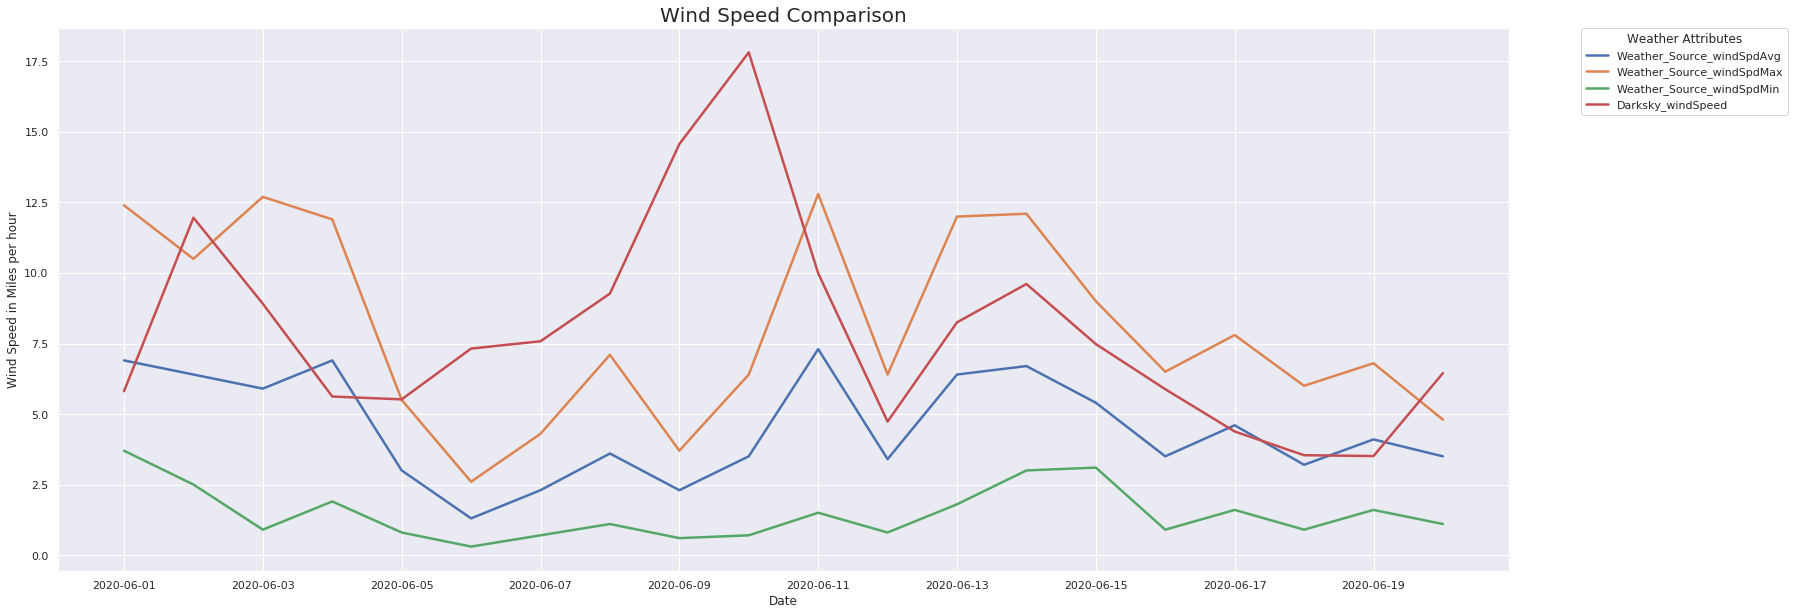

In [17]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date', 'windSpdAvg', 'windSpdMax', 'windSpdMin', 'windSpeed']], ['Date']))
    new_labels = ['Weather_Source_windSpdAvg', 'Weather_Source_windSpdMax', 'Weather_Source_windSpdMin', 'Darksky_windSpeed']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Wind Speed in Miles per hour',title="Wind Speed Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

Evident difference in wind speed in Weather Source and Darksky

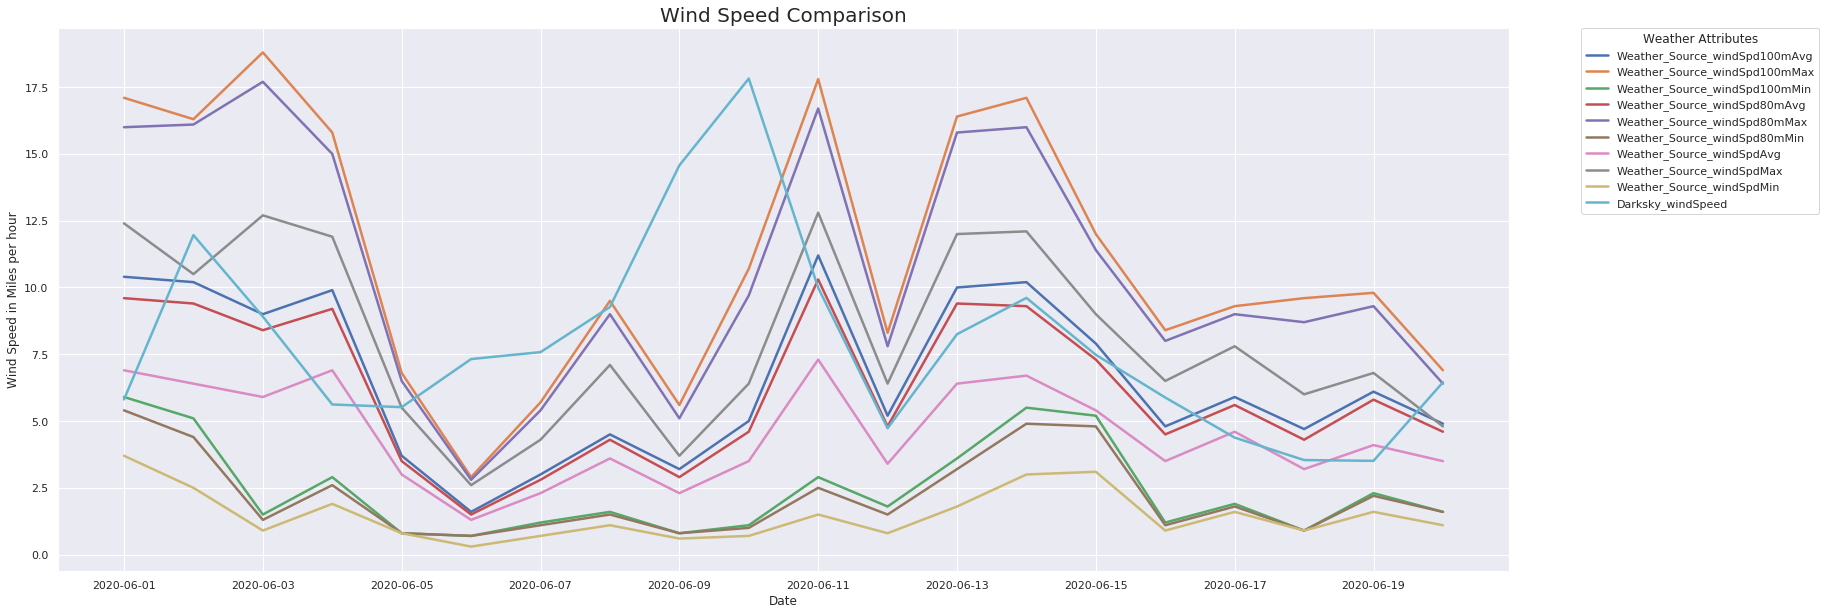

In [18]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','windSpd100mAvg','windSpd100mMax','windSpd100mMin','windSpd80mAvg', 'windSpd80mMax', 'windSpd80mMin', 'windSpdAvg', 'windSpdMax', 'windSpdMin', 'windSpeed']], ['Date']))
    new_labels = ["Weather_Source_windSpd100mAvg","Weather_Source_windSpd100mMax","Weather_Source_windSpd100mMin","Weather_Source_windSpd80mAvg", "Weather_Source_windSpd80mMax", "Weather_Source_windSpd80mMin",
                  'Weather_Source_windSpdAvg', 'Weather_Source_windSpdMax', 'Weather_Source_windSpdMin', 'Darksky_windSpeed']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Wind Speed in Miles per hour',title="Wind Speed Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

In [19]:
wind_dir = merged_data.filter(regex=("windD"))
print(list(wind_dir.columns))
wind_breaing = merged_data.filter(regex=("windB"))
print(list(wind_breaing.columns))

['windDir100mAvg', 'windDir80mAvg', 'windDirAvg']
['windBearing']


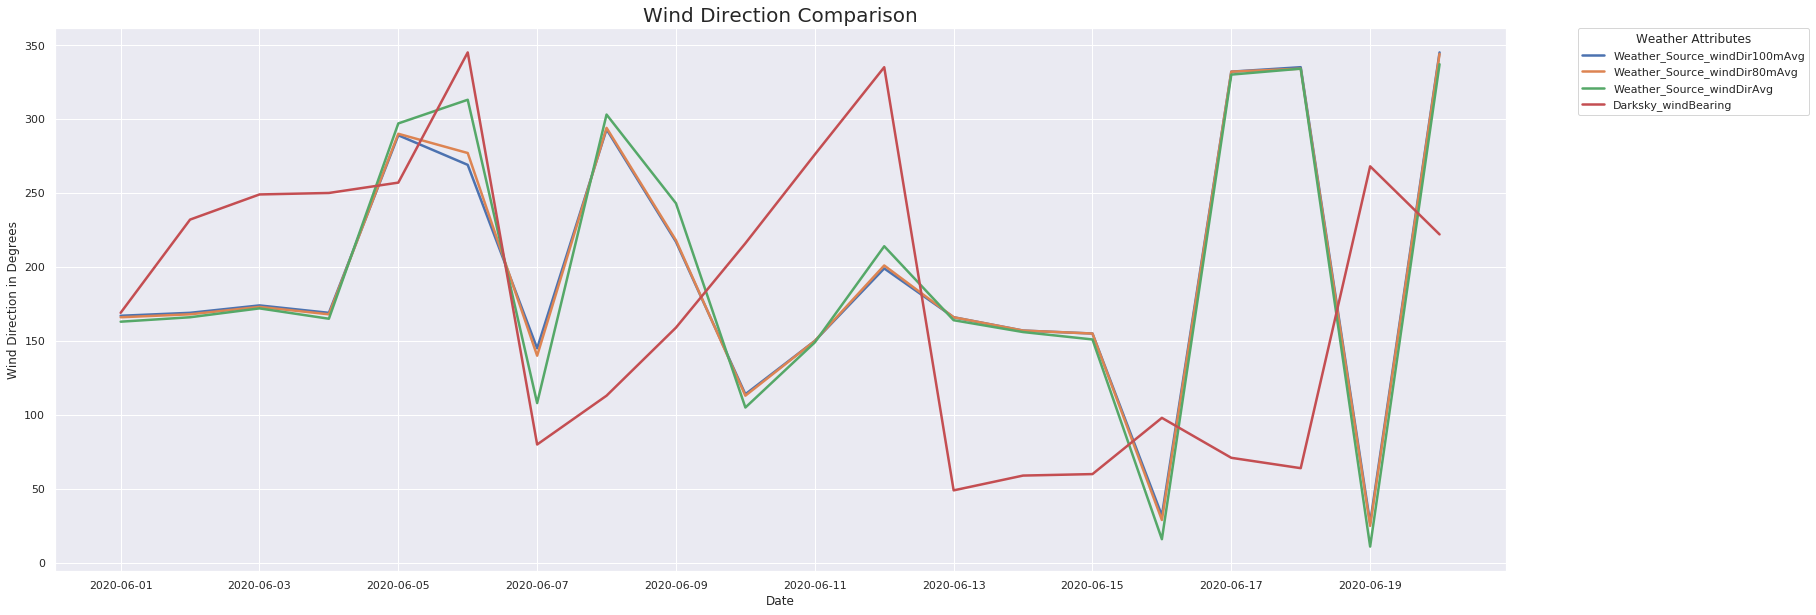

In [20]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','windDir100mAvg','windDir80mAvg','windDirAvg','windBearing']], ['Date']))
    new_labels = ['Weather_Source_windDir100mAvg', 'Weather_Source_windDir80mAvg', 'Weather_Source_windDirAvg', 'Darksky_windBearing']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Wind Direction in Degrees',title="Wind Direction Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

Evident difference in Weather Source wind direction and Dark sky wind direction

In [21]:
temp = merged_data.filter(regex=("temp"))
print(list(temp.columns))

['tempAvg', 'tempMax', 'tempMin', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'temperatureMax', 'temperatureMaxTime', 'temperatureMin', 'temperatureMinTime']


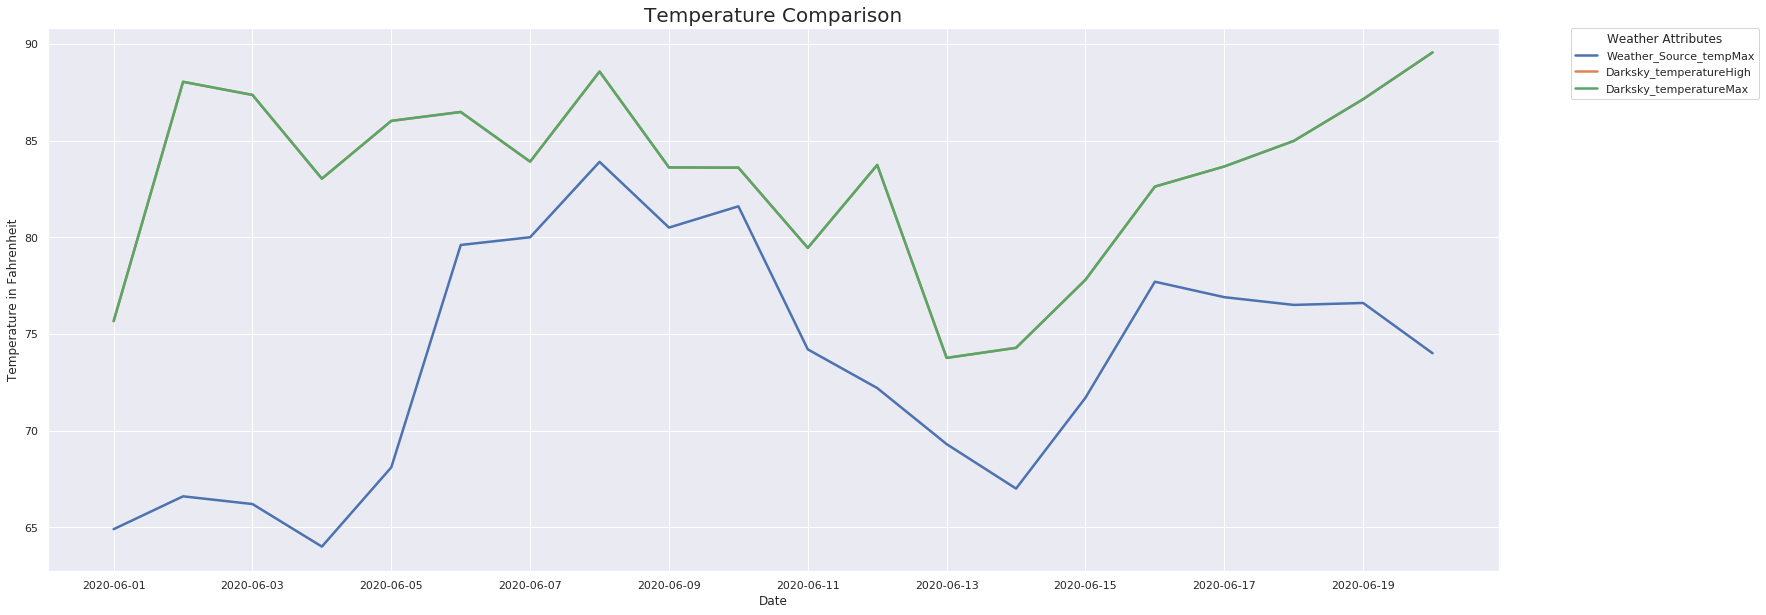

In [22]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','tempMax', 'temperatureHigh', 'temperatureMax']], ['Date']))
    new_labels = ['Weather_Source_tempMax', 'Darksky_temperatureHigh','Darksky_temperatureMax']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Temperature in Fahrenheit',title="Temperature Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

Maximum temperature difference between Weather Source and Dark-sky

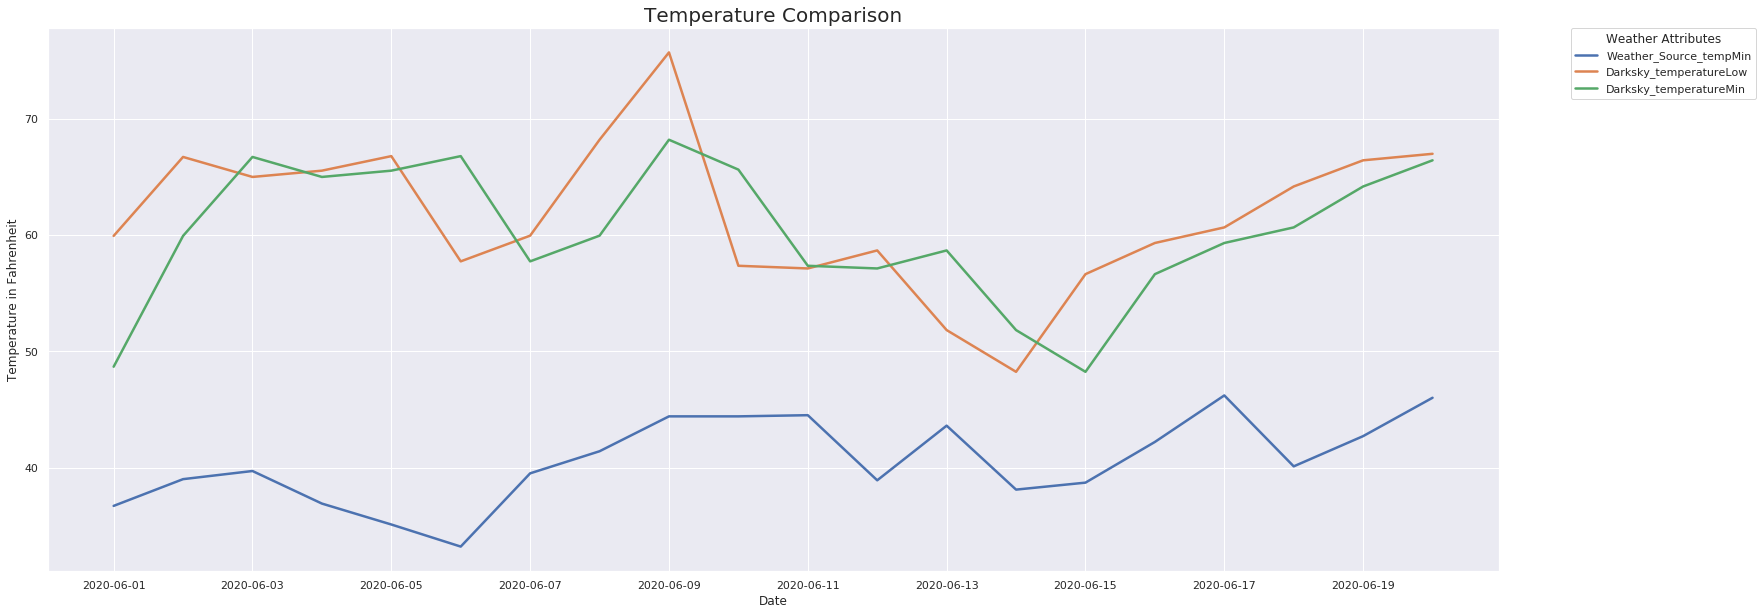

In [23]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','tempMin', 'temperatureLow', 'temperatureMin']], ['Date']))
    new_labels = ['Weather_Source_tempMin', 'Darksky_temperatureLow','Darksky_temperatureMin']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Temperature in Fahrenheit',title="Temperature Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

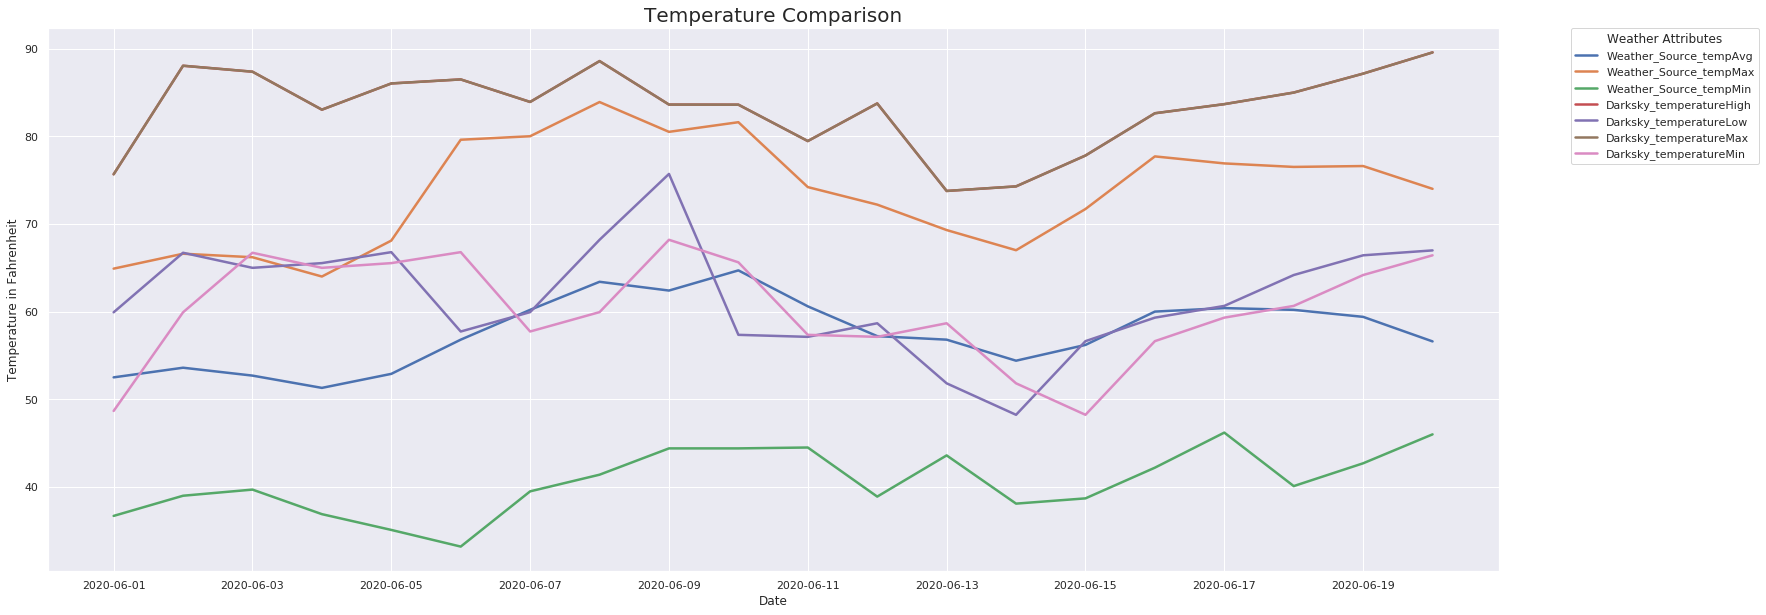

In [24]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','tempAvg','tempMax','tempMin','temperatureHigh', 'temperatureLow', 'temperatureMax', 'temperatureMin']], ['Date']))
    new_labels = ['Weather_Source_tempAvg', 'Weather_Source_tempMax', 'Weather_Source_tempMin', 'Darksky_temperatureHigh', 'Darksky_temperatureLow', 'Darksky_temperatureMax', 'Darksky_temperatureMin']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Temperature in Fahrenheit',title="Temperature Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

# max, min, avg different
# add comments (2nd june)

Huge difference in Weather Source Temp Max and Darksky temperature Max

In [25]:
cloudcover = merged_data.filter(regex=("cl"))
print(list(cloudcover.columns))

['cldCvrAvg', 'cldCvrMax', 'cldCvrMin', 'cloudCover']


In [26]:
# bring cloud-cover to equal scale
merged_data['cloudCover'] = merged_data['cloudCover']*100

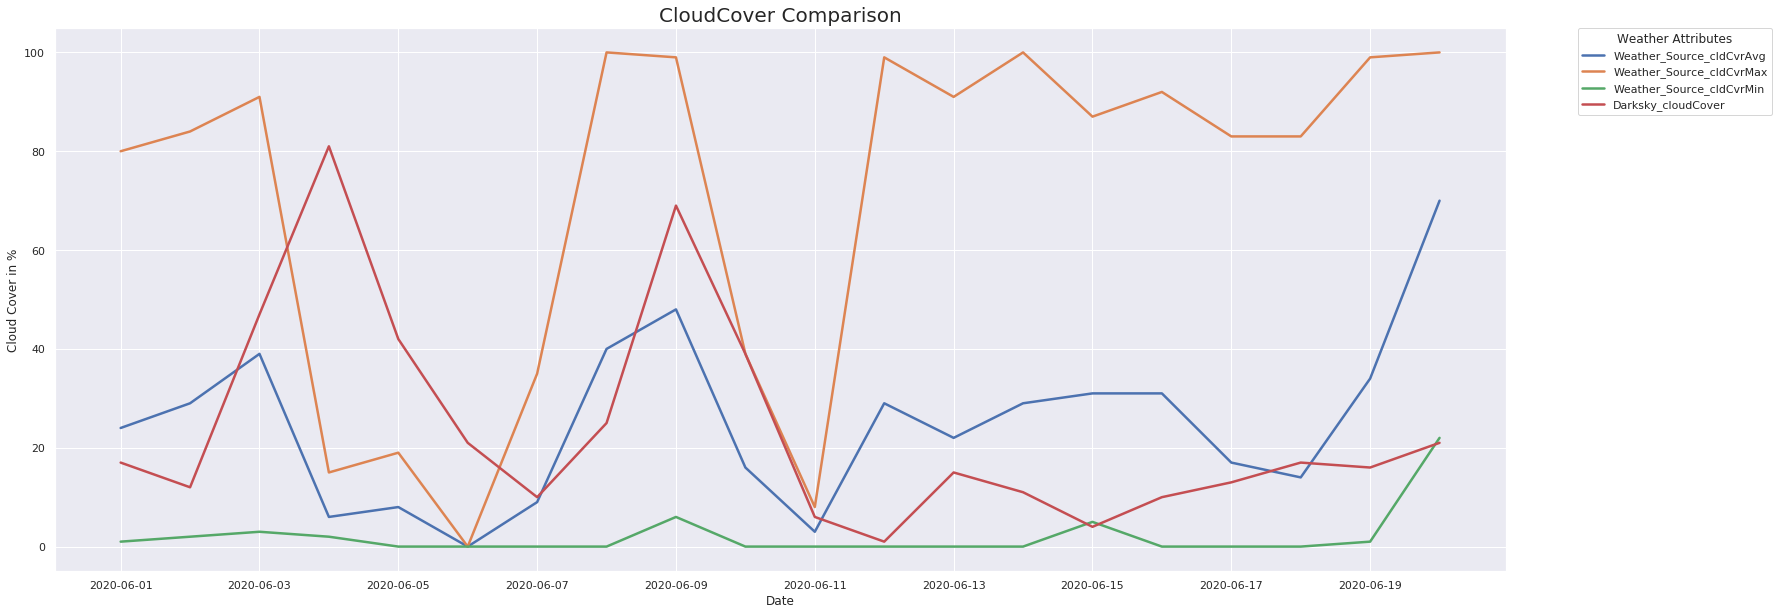

In [27]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','cldCvrAvg','cldCvrMax','cldCvrMin','cloudCover']], ['Date']))
    new_labels = ["Weather_Source_cldCvrAvg","Weather_Source_cldCvrMax","Weather_Source_cldCvrMin","Darksky_cloudCover"]
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Cloud Cover in %',title="CloudCover Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Weather Attributes',labels=new_labels)

Difference in Weather Source cloudcover avg and Dark sky cloud cover

In [28]:
feels_like = merged_data.filter(regex=("feel"))
print(list(feels_like.columns))
apparent = merged_data.filter(regex=("apparent"))
print(list(apparent.columns))

['feelsLikeAvg', 'feelsLikeMax', 'feelsLikeMin']
['apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime']


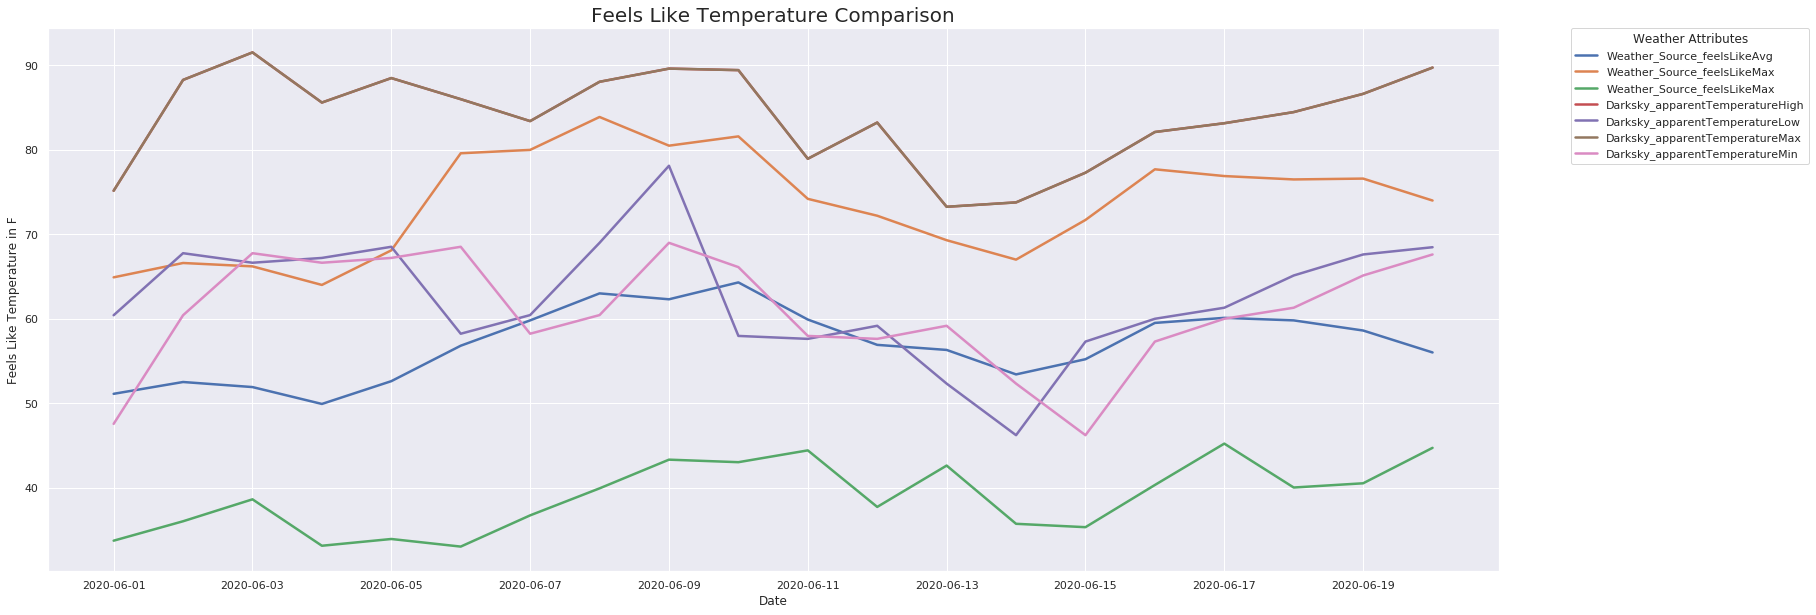

In [29]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','feelsLikeAvg','feelsLikeMax','feelsLikeMin','apparentTemperatureHigh','apparentTemperatureLow', 'apparentTemperatureMax', 'apparentTemperatureMin']], ['Date']))
    new_labels = ["Weather_Source_feelsLikeAvg","Weather_Source_feelsLikeMax","Weather_Source_feelsLikeMax","Darksky_apparentTemperatureHigh","Darksky_apparentTemperatureLow", "Darksky_apparentTemperatureMax", "Darksky_apparentTemperatureMin"]
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Feels Like Temperature in F',title="Feels Like Temperature Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

Huge difference in 2nd of June Weather Source in feelsLike Max and Dark sky apparent Temperature max

In [30]:
dew_point = merged_data.filter(regex=("dew"))
print(list(dew_point.columns))

['dewPtAvg', 'dewPtMax', 'dewPtMin', 'dewPoint']


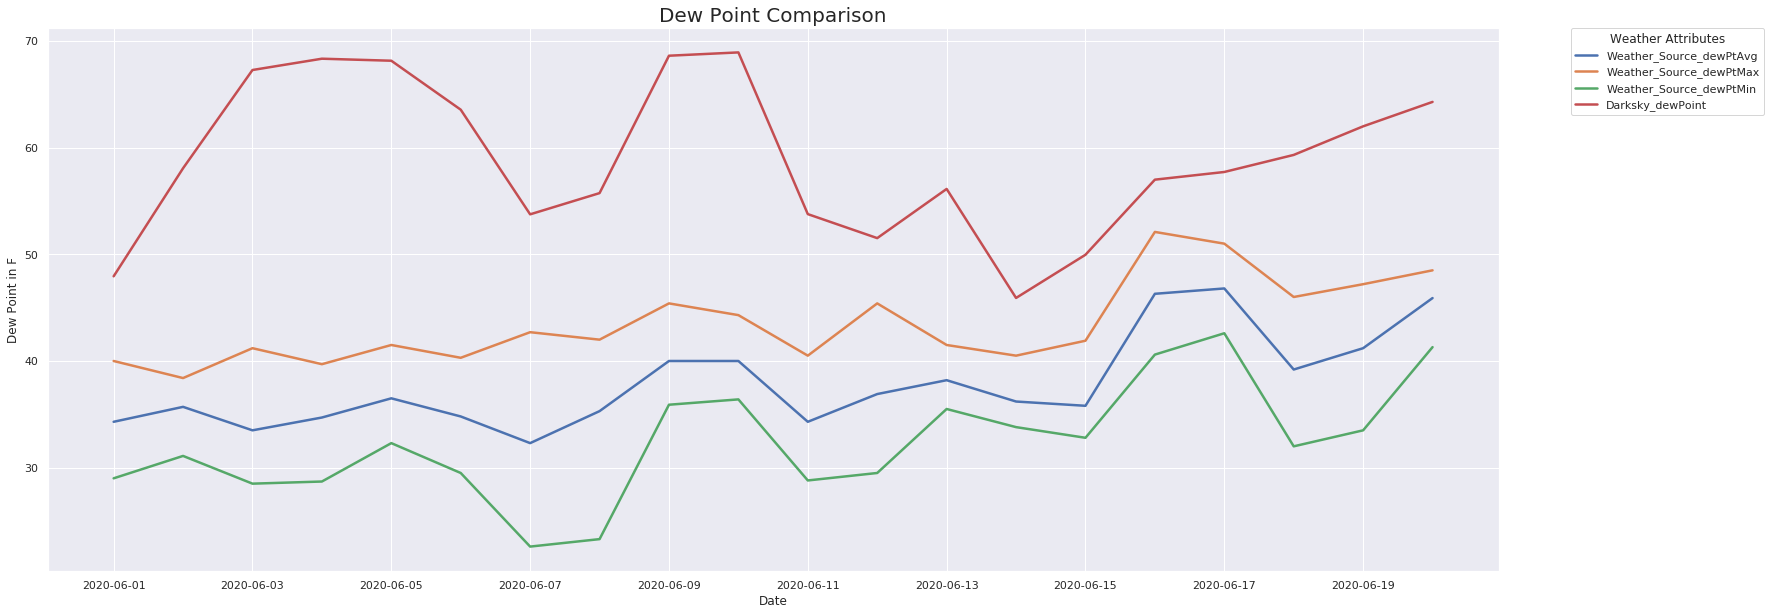

In [31]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','dewPtAvg', 'dewPtMax', 'dewPtMin', 'dewPoint']], ['Date']))
    new_labels = ["Weather_Source_dewPtAvg","Weather_Source_dewPtMax","Weather_Source_dewPtMin","Darksky_dewPoint"]
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Dew Point in F',title="Dew Point Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

Weather Source Dewpoint and Darksky Dewpoint is very different

In [32]:
msl_pres = merged_data.filter(regex=("msl"))
print(list(msl_pres.columns))
sfc_pres = merged_data.filter(regex=("sfcPres"))
print(list(sfc_pres.columns))
pres = merged_data.filter(regex=("pres"))
print(list(pres.columns))

['mslPresAvg', 'mslPresMax', 'mslPresMin']
['sfcPresAvg', 'sfcPresMax', 'sfcPresMin']
['presTendAvg', 'presTendMax', 'presTendMin', 'pressure']


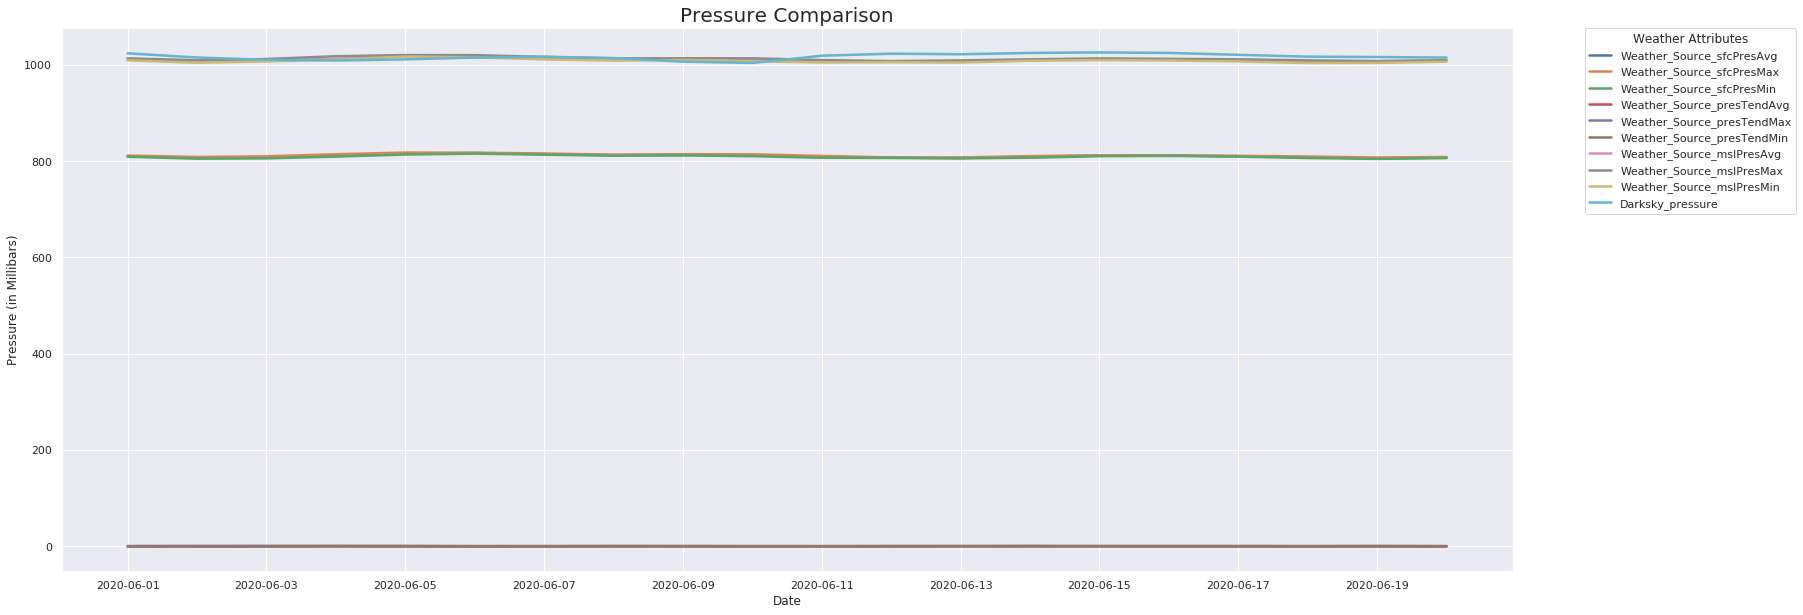

In [33]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','sfcPresAvg', 'sfcPresMax', 'sfcPresMin', 'presTendAvg', 'presTendMax', 'presTendMin', 'mslPresAvg', 'mslPresMax', 'mslPresMin', 'pressure']], ['Date']))
    new_labels = ["Weather_Source_sfcPresAvg","Weather_Source_sfcPresMax","Weather_Source_sfcPresMin","Weather_Source_presTendAvg",'Weather_Source_presTendMax','Weather_Source_presTendMin','Weather_Source_mslPresAvg',
                  'Weather_Source_mslPresMax', 'Weather_Source_mslPresMin', "Darksky_pressure"]
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Pressure (in Millibars)',title="Pressure Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

Weather Source and Dark sky Pressure are alomost similar

In [34]:
humm = merged_data.filter(regex=("Hum"))
print(list(humm.columns))
hum = merged_data.filter(regex=("hum"))
print(list(hum.columns))

['relHumAvg', 'relHumMax', 'relHumMin', 'spcHumAvg', 'spcHumMax', 'spcHumMin']
['humidity']


In [35]:
merged_data['humidity'] = merged_data['humidity'] * 100

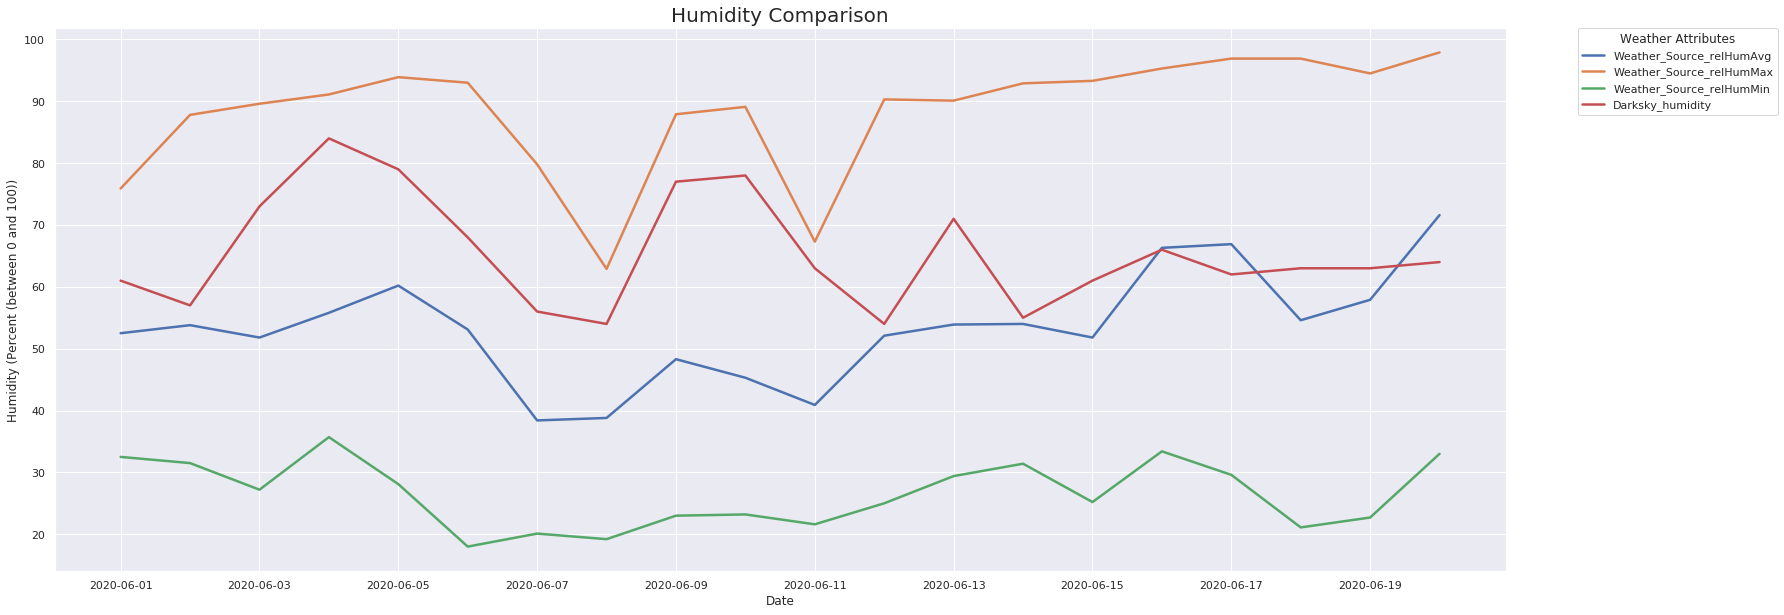

In [36]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','relHumAvg', 'relHumMax', 'relHumMin', 'humidity']], ['Date']))
    new_labels = ["Weather_Source_relHumAvg","Weather_Source_relHumMax","Weather_Source_relHumMin","Darksky_humidity"]
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Humidity (Percent (between 0 and 100))',title="Humidity Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

Weather Source average humidity and Dark-sky humidity is different 

## **Comparison of Weather Markers**

### **See if weather data is different for the 4 markers**

In [37]:
df_ads = pd.read_csv('gs://aes-datahub-0001-curated/Outage_Restoration/Historical_Data/Master_Dataset/OMS_IPL_OUTAGE_DATASET_V8.6.csv')
df_ads = df_ads.loc[:, ~df_ads.columns.str.contains('^Unnamed')]
ads = df_ads[df_ads.EVENT=='STORM']

import folium
from folium import plugins
from folium.plugins import HeatMap

map_hooray = folium.Map(location=[39.79539483799981,-86.14932829759584],zoom_start = 11) 

# Ensure you're handing it floats
ads['LAT'] = ads['LAT'].astype(float)
ads['LONG'] = ads['LONG'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = ads[['LAT', 'LONG']]

# Create weight column, using date
heat_df = heat_df.dropna(axis=0, subset=['LAT','LONG'])
heat_df['combined'] = list(zip(heat_df.LAT, heat_df.LONG))

heat_data = list(heat_df.combined)

folium.Marker([39.9613, -86.4034],
              popup='Marker 1 [Lat,Long]=[39.9613, -86.4034]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)

folium.Marker([39.8971, -86.3045],
              popup='Marker 2 [Lat,Long]=[39.8971, -86.3045]',
              icon=folium.Icon(color='green')
             ).add_to(map_hooray)

folium.Marker([39.9060, -86.2001],
              popup='Marker 3 [Lat,Long]=[39.9060, -86.2001]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)

folium.Marker([39.9024, -86.0738],
              popup='Marker 4 [Lat,Long]=[39.9024, -86.0738]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)

folium.Marker([39.8960, -85.9783],
              popup='Marker 5 [Lat,Long]=[39.8960, -85.9783]',
              icon=folium.Icon(color='green')
             ).add_to(map_hooray)

folium.Marker([39.8339, -86.3155],
              popup='Marker 6 [Lat,Long]=[39.8339, -86.3155]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)

folium.Marker([39.8412, -86.2056],
              popup='Marker 7 [Lat,Long]=[39.8412, -86.2056]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)

folium.Marker([39.8381, -86.0985],
              popup='Marker 8 [Lat,Long]=[39.8381, -86.0985]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)

folium.Marker([39.8386, -85.9811],
              popup='Marker 9 [Lat,Long]=[39.8386, -85.9811]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)

folium.Marker([39.7579, -86.3155],
              popup='Marker 10 [Lat,Long]=[39.7579, -86.3155]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)

folium.Marker([39.7621, -86.2042],
              popup='Marker 11 [Lat,Long]=[39.7621, -86.2042]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)

folium.Marker([39.7621, -86.0923],
              popup='Marker 12 [Lat,Long]=[39.7621, -86.0923]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)

folium.Marker([39.7695, -85.9708],
              popup='Marker 13 [Lat,Long]=[39.7695, -85.9708]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)

folium.Marker([39.6617, -86.2935],
              popup='Marker 14 [Lat,Long]=[39.6617, -86.2935]',
              icon=folium.Icon(color='green')
             ).add_to(map_hooray)

folium.Marker([39.6639, -86.1823],
              popup='Marker 15 [Lat,Long]=[39.6639, -86.1823]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)

folium.Marker([39.6702, -86.0669],
              popup='Marker 16 [Lat,Long]=[39.6702, -86.0669]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)

folium.Marker([39.6744, -85.9557],
              popup='Marker 17 [Lat,Long]=[39.6744, -85.9557]',
              icon=folium.Icon(color='green')
             ).add_to(map_hooray)

folium.Marker([39.5909, -86.4212],
              popup='Marker 18 [Lat,Long]=[39.5909, -86.4212]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)
 
folium.Marker([39.5295, -86.5874],
              popup='Marker 19 [Lat,Long]=[39.5295, -86.5874]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)

folium.Marker([39.5475, -86.2743],
              popup='Marker 20 [Lat,Long]=[39.5475, -86.2743]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)


# Display the map
map_hooray

In [38]:
marker_dict = {
    'Marker 2' :['39.8971', '-86.3045'],
    'Marker 5' :['39.8960', '-85.9783'],
    'Marker 14':['39.6617', '-86.2935'],
    'Marker 17':['39.6744', '-85.9557']
}


start_date = "2020-06-01"
end_date = "2020-06-20"

weathersource_marker2 = ws_historical_data(start=start_date, end=end_date, lat=marker_dict.get('Marker 2')[0], long=marker_dict.get('Marker 2')[1], period='day')
weathersource_marker5 = ws_historical_data(start=start_date, end=end_date, lat=marker_dict.get('Marker 5')[0], long=marker_dict.get('Marker 5')[1], period='day')
weathersource_marker14 = ws_historical_data(start=start_date, end=end_date, lat=marker_dict.get('Marker 14')[0], long=marker_dict.get('Marker 14')[1], period='day')
weathersource_marker17 = ws_historical_data(start=start_date, end=end_date, lat=marker_dict.get('Marker 17')[0], long=marker_dict.get('Marker 17')[1], period='day')

https://api.weathersource.com/v1/e721181f854ac2268ee8/points/39.8971,-86.3045/history.json?period=day&timestamp_between=2020-06-01T00:00:00,2020-06-20T00:00:00&fields=all
https://api.weathersource.com/v1/e721181f854ac2268ee8/points/39.8960,-85.9783/history.json?period=day&timestamp_between=2020-06-01T00:00:00,2020-06-20T00:00:00&fields=all
https://api.weathersource.com/v1/e721181f854ac2268ee8/points/39.6617,-86.2935/history.json?period=day&timestamp_between=2020-06-01T00:00:00,2020-06-20T00:00:00&fields=all
https://api.weathersource.com/v1/e721181f854ac2268ee8/points/39.6744,-85.9557/history.json?period=day&timestamp_between=2020-06-01T00:00:00,2020-06-20T00:00:00&fields=all


In [39]:
weathersource_marker2['date_time'] = pd.to_datetime(weathersource_marker2['timestamp'])
weathersource_marker2['Date'] = weathersource_marker2['date_time'].dt.date

weathersource_marker5['date_time'] = pd.to_datetime(weathersource_marker5['timestamp'])
weathersource_marker5['Date'] = weathersource_marker5['date_time'].dt.date

weathersource_marker14['date_time'] = pd.to_datetime(weathersource_marker14['timestamp'])
weathersource_marker14['Date'] = weathersource_marker14['date_time'].dt.date

weathersource_marker17['date_time'] = pd.to_datetime(weathersource_marker17['timestamp'])
weathersource_marker17['Date'] = weathersource_marker17['date_time'].dt.date

In [40]:
weathersource_marker2.drop(['date_time'],axis=1,inplace=True)
weathersource_marker5.drop(['date_time'],axis=1,inplace=True)
weathersource_marker14.drop(['date_time'],axis=1,inplace=True)
weathersource_marker17.drop(['date_time'],axis=1,inplace=True)

In [41]:
marker2_cols = weathersource_marker2.columns[~weathersource_marker2.columns.isin(['Date'])]
weathersource_marker2.rename(columns = dict(zip(marker2_cols, 'Marker2_' + marker2_cols)), inplace=True)

marker5_cols = weathersource_marker5.columns[~weathersource_marker5.columns.isin(['Date'])]
weathersource_marker5.rename(columns = dict(zip(marker5_cols, 'Marker5_' + marker5_cols)), inplace=True)

marker14_cols = weathersource_marker14.columns[~weathersource_marker14.columns.isin(['Date'])]
weathersource_marker14.rename(columns = dict(zip(marker14_cols, 'Marker14_' + marker14_cols)), inplace=True)

marker17_cols = weathersource_marker17.columns[~weathersource_marker17.columns.isin(['Date'])]
weathersource_marker17.rename(columns = dict(zip(marker17_cols, 'Marker17_' + marker17_cols)), inplace=True)

In [42]:
m1 = pd.merge(weathersource_marker2,weathersource_marker5, on=['Date'], how='left')
m4 = pd.merge(m1,weathersource_marker14, on=['Date'], how='left')
merged_data = pd.merge(m4,weathersource_marker17, on=['Date'], how='left')

In [43]:
data = merged_data[['Date','Marker2_windSpdAvg', 'Marker5_windSpdAvg', 'Marker14_windSpdAvg', 'Marker17_windSpdAvg', 
                    'Marker2_windDirAvg', 'Marker5_windDirAvg', 'Marker14_windDirAvg', 'Marker17_windDirAvg',
                    'Marker2_tempAvg', 'Marker5_tempAvg', 'Marker14_tempAvg', 'Marker17_tempAvg',
                    'Marker2_cldCvrAvg', 'Marker5_cldCvrAvg', 'Marker14_cldCvrAvg', 'Marker17_cldCvrAvg', 
                    'Marker2_feelsLikeAvg', 'Marker5_feelsLikeAvg', 'Marker14_feelsLikeAvg', 'Marker17_feelsLikeAvg', 
                    'Marker2_dewPtAvg', 'Marker5_dewPtAvg', 'Marker14_dewPtAvg', 'Marker17_dewPtAvg',
                    'Marker2_sfcPresAvg', 'Marker5_sfcPresAvg', 'Marker14_sfcPresAvg', 'Marker17_sfcPresAvg',
                    'Marker2_relHumAvg', 'Marker2_relHumAvg', 'Marker2_relHumAvg', 'Marker2_relHumAvg'
                    ]]
data

,Date,Marker2_windSpdAvg,Marker5_windSpdAvg,Marker14_windSpdAvg,Marker17_windSpdAvg,Marker2_windDirAvg,Marker5_windDirAvg,Marker14_windDirAvg,Marker17_windDirAvg,Marker2_tempAvg,Marker5_tempAvg,Marker14_tempAvg,Marker17_tempAvg,Marker2_cldCvrAvg,Marker5_cldCvrAvg,Marker14_cldCvrAvg,Marker17_cldCvrAvg,Marker2_feelsLikeAvg,Marker5_feelsLikeAvg,Marker14_feelsLikeAvg,Marker17_feelsLikeAvg,Marker2_dewPtAvg,Marker5_dewPtAvg,Marker14_dewPtAvg,Marker17_dewPtAvg,Marker2_sfcPresAvg,Marker5_sfcPresAvg,Marker14_sfcPresAvg,Marker17_sfcPresAvg,Marker2_relHumAvg,Marker2_relHumAvg,Marker2_relHumAvg,Marker2_relHumAvg
0,2020-06-01,4.60,4.40,4.00,4.50,176,175,163,175,63.30,63.70,63.60,63.70,11,12,13,12,63.20,63.50,63.50,63.60,47.10,46.30,47.80,47.00,991.70,993.60,995.90,994.50,57.50,57.50,57.50,57.50
1,2020-06-02,9.80,8.40,8.70,8.70,231,229,228,227,75.00,76.30,74.60,74.70,7,4,10,6,75.50,76.70,74.90,75.00,55.80,54.40,55.50,55.00,984.10,985.60,988.50,986.90,52.40,52.40,52.40,52.40
2,2020-06-03,6.90,6.60,7.30,7.00,251,254,236,245,76.20,76.50,77.00,76.60,44,42,34,34,77.80,78.00,78.80,78.20,65.20,64.70,64.70,64.50,979.60,981.00,983.80,982.10,70.30,70.30,70.30,70.30
3,2020-06-04,4.70,3.50,4.10,3.60,257,249,256,235,73.20,74.20,73.70,74.50,67,66,62,65,74.60,75.60,75.10,75.80,67.00,67.30,67.60,67.80,978.30,979.60,982.30,980.60,81.70,81.70,81.70,81.70
4,2020-06-05,4.90,4.00,4.50,4.40,260,266,267,269,76.30,77.60,76.70,77.40,34,29,35,32,78.10,79.40,78.30,78.90,66.90,66.50,66.80,66.40,981.00,982.20,985.00,983.20,74.60,74.60,74.60,74.60
5,2020-06-06,6.80,6.00,5.80,6.10,344,337,340,339,77.20,77.80,78.10,78.30,13,13,13,14,77.90,78.60,79.20,79.20,60.40,60.40,61.90,61.70,984.00,985.20,987.90,986.00,59.50,59.50,59.50,59.50
6,2020-06-07,6.50,5.10,5.70,5.80,81,80,81,78,72.60,72.20,73.10,72.40,6,7,4,5,72.70,72.30,73.20,72.40,51.60,52.30,52.80,52.20,985.50,987.10,989.30,987.80,49.40,49.40,49.40,49.40
7,2020-06-08,8.30,6.70,8.00,7.30,112,114,105,107,75.80,74.80,75.30,74.90,32,33,38,39,75.90,74.90,75.50,75.00,52.00,52.80,54.20,53.30,983.00,984.70,986.90,985.50,45.60,45.60,45.60,45.60
8,2020-06-09,12.70,11.00,13.50,12.20,166,166,165,167,77.50,77.70,77.40,77.30,63,57,61,51,80.70,81.00,80.70,80.60,67.40,67.30,68.20,68.10,975.70,977.60,979.90,978.80,71.60,71.60,71.60,71.60
9,2020-06-10,16.10,13.70,16.10,15.80,220,219,220,215,76.10,77.50,77.00,77.40,45,49,46,51,79.20,80.70,80.20,80.70,66.30,66.20,66.40,66.40,974.00,975.40,978.40,976.80,72.40,72.40,72.40,72.40


### **Comparison of Wind Speed between the 4 location Markers**

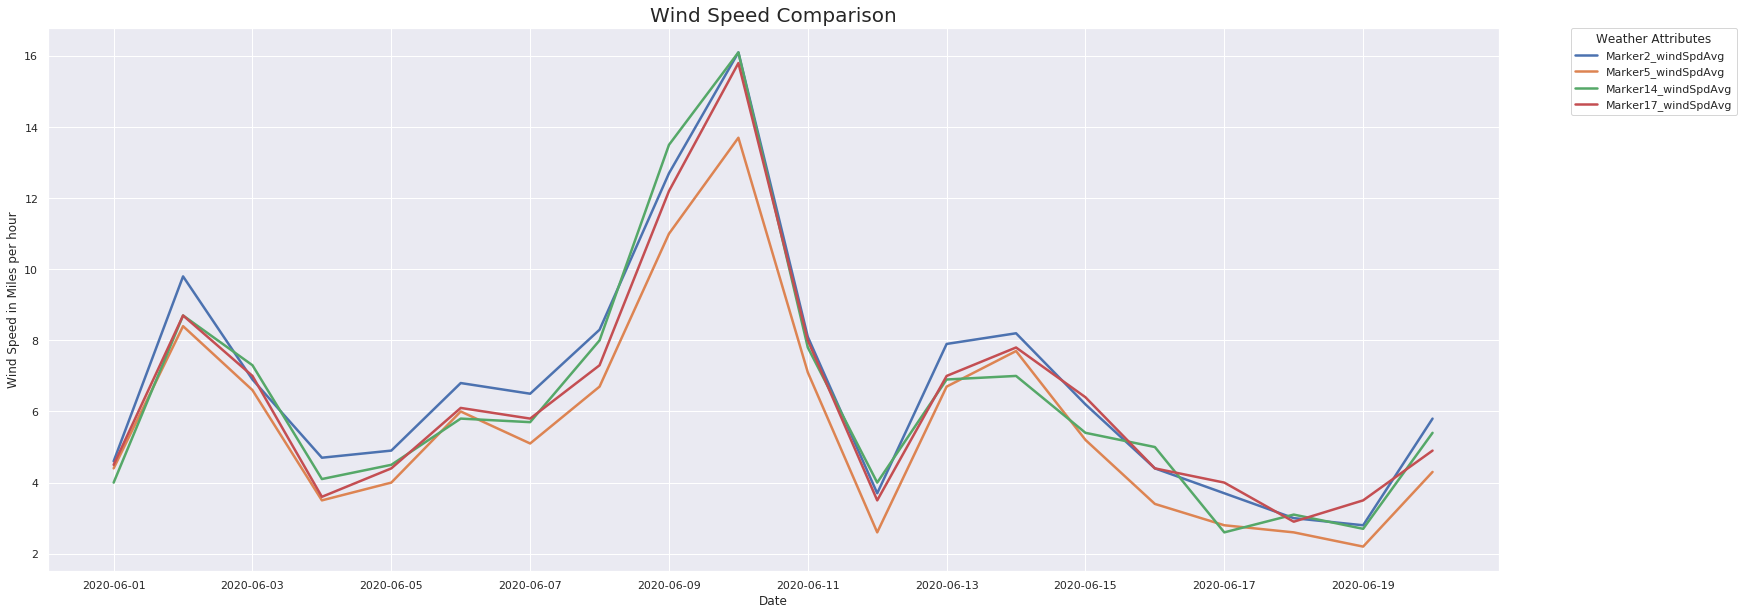

In [44]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date', 'Marker2_windSpdAvg','Marker5_windSpdAvg','Marker14_windSpdAvg','Marker17_windSpdAvg']], ['Date']))
    new_labels = ['Marker2_windSpdAvg','Marker5_windSpdAvg','Marker14_windSpdAvg','Marker17_windSpdAvg']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Wind Speed in Miles per hour',title="Wind Speed Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

### **Comparison of Wind Direction between the 4 location Markers**

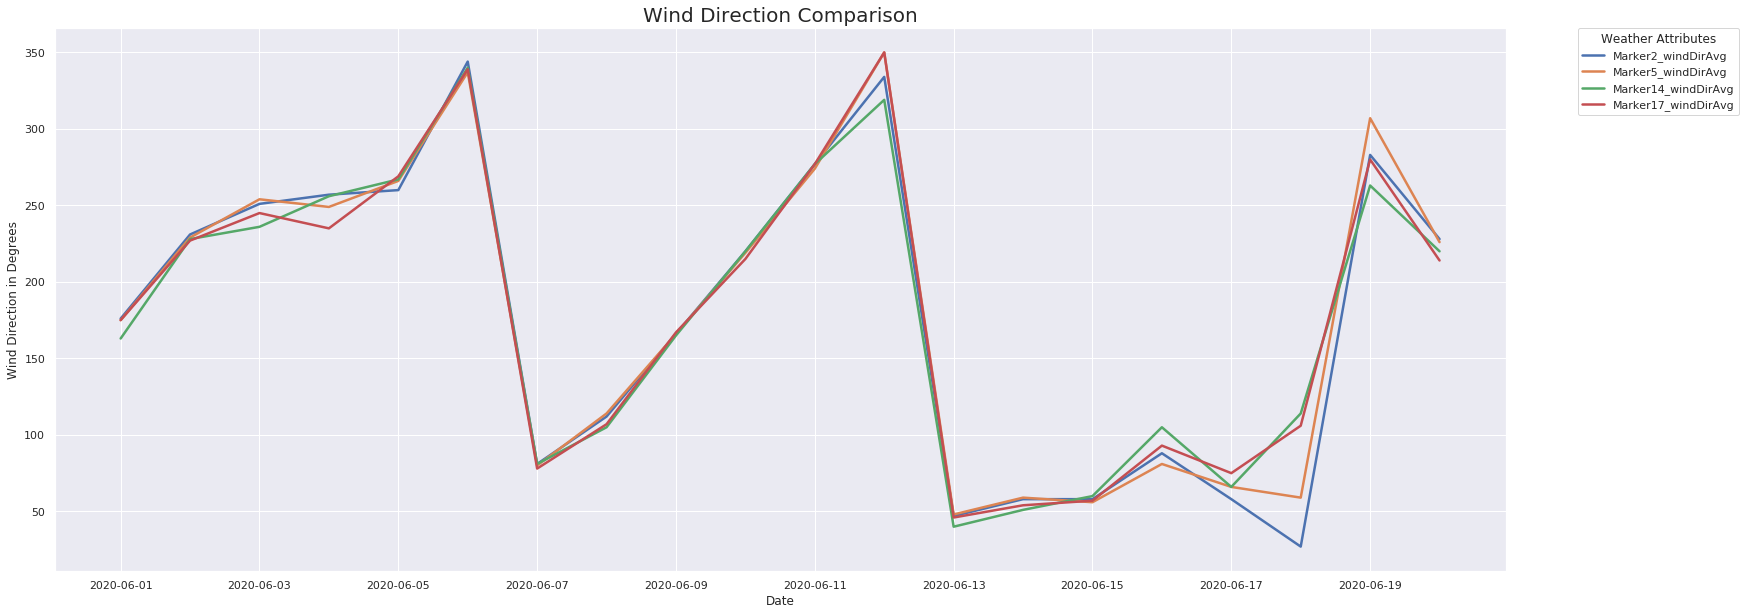

In [45]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','Marker2_windDirAvg','Marker5_windDirAvg','Marker14_windDirAvg','Marker17_windDirAvg']], ['Date']))
    new_labels = ['Marker2_windDirAvg','Marker5_windDirAvg','Marker14_windDirAvg','Marker17_windDirAvg']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Wind Direction in Degrees',title="Wind Direction Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

### **Comparison of Temperature between the 4 location Markers**

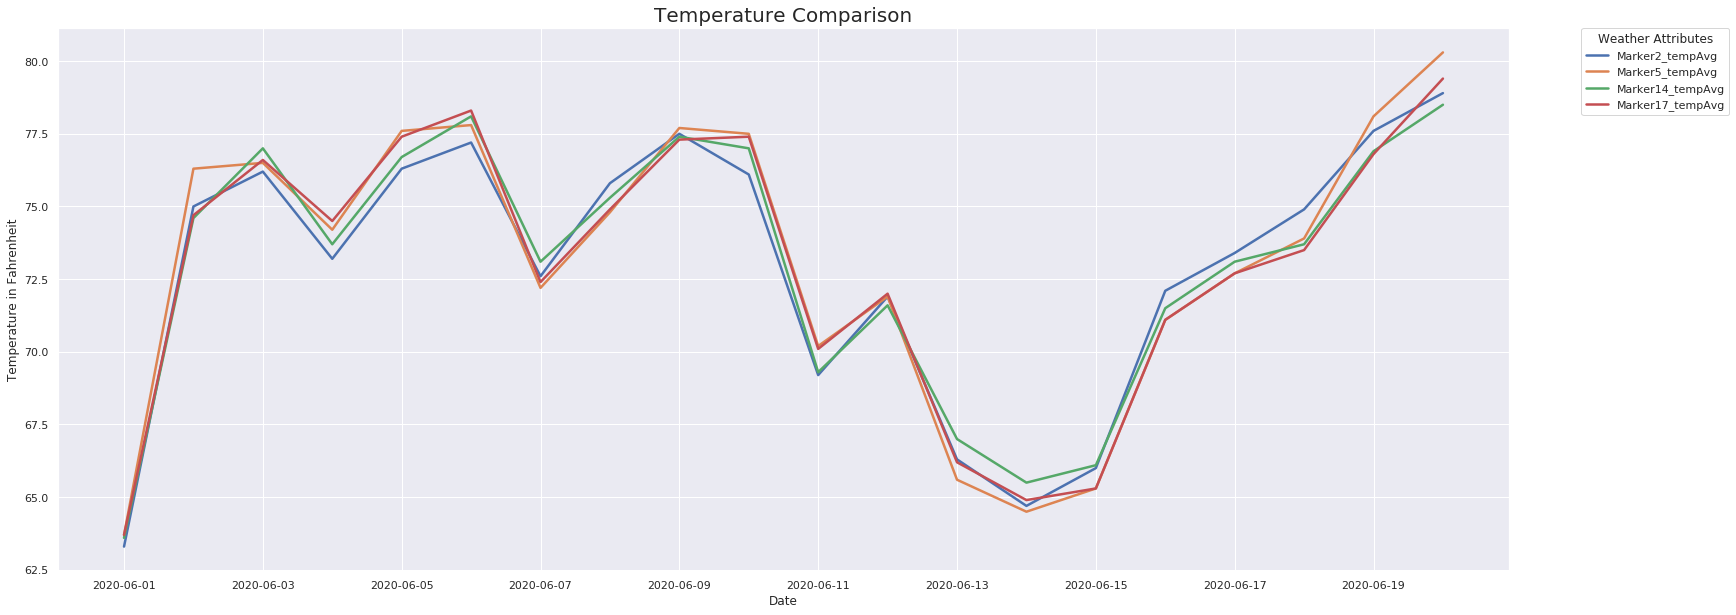

In [46]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date', 'Marker2_tempAvg','Marker5_tempAvg', 'Marker14_tempAvg','Marker17_tempAvg']], ['Date']))
    new_labels = ['Marker2_tempAvg','Marker5_tempAvg', 'Marker14_tempAvg','Marker17_tempAvg']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Temperature in Fahrenheit',title="Temperature Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

### **Comparison of CloudCover between the 4 location Markers**

In [ ]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','Marker2_cldCvrAvg', 'Marker5_cldCvrAvg','Marker14_cldCvrAvg', 'Marker17_cldCvrAvg']], ['Date']))
    new_labels = ['Marker2_cldCvrAvg', 'Marker5_cldCvrAvg','Marker14_cldCvrAvg', 'Marker17_cldCvrAvg']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Cloud Cover in %',title="CloudCover Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Weather Attributes',labels=new_labels)

### **Comparison of Feels like Temperature between the 4 location Markers**

In [ ]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','Marker2_feelsLikeAvg','Marker5_feelsLikeAvg','Marker14_feelsLikeAvg','Marker17_feelsLikeAvg']], ['Date']))
    new_labels = ['Marker2_feelsLikeAvg','Marker5_feelsLikeAvg','Marker14_feelsLikeAvg','Marker17_feelsLikeAvg']
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Feels Like Temperature in F',title="Feels Like Temperature Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

### **Comparison of Dew Point between the 4 location Markers**

In [ ]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','Marker2_dewPtAvg','Marker5_dewPtAvg','Marker14_dewPtAvg', 'Marker17_dewPtAvg']], ['Date']))
    new_labels = ['Marker2_dewPtAvg','Marker5_dewPtAvg','Marker14_dewPtAvg', 'Marker17_dewPtAvg']
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Dew Point in F',title="Dew Point Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

### **Comparison of Pressure between the 4 location Markers**

In [ ]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','Marker2_sfcPresAvg', 'Marker5_sfcPresAvg', 'Marker14_sfcPresAvg', 'Marker17_sfcPresAvg']], ['Date']))
    new_labels = ['Marker2_sfcPresAvg', 'Marker5_sfcPresAvg', 'Marker14_sfcPresAvg', 'Marker17_sfcPresAvg']
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Pressure (in Millibars)',title="Pressure Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

### **Comparison of Humidity between the 4 location Markers**

In [ ]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','Marker2_relHumAvg','Marker5_relHumAvg','Marker14_relHumAvg','Marker17_relHumAvg']], ['Date']))
    new_labels = ['Marker2_relHumAvg','Marker5_relHumAvg','Marker14_relHumAvg','Marker17_relHumAvg']
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Humidity (Percent (between 0 and 100))',title="Humidity Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

## Weather Sensitivity for 1 mile and 5 mile

In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap

map_hooray = folium.Map(location=[39.79539483799981,-86.14932829759584],zoom_start = 12) 

folium.Marker([39.7621, -86.0923],
              popup='Marker 12 [Lat,Long]=[39.7621, -86.0923]',
              icon=folium.Icon(color='orange')
             ).add_to(map_hooray)

folium.Circle([39.7621, -86.0923],radius=1609.34,color='#808080').add_to(map_hooray)
folium.Circle([39.7621, -86.0923],radius=8046.72,color='#808080').add_to(map_hooray)

folium.Marker([39.7645, -85.9986],popup='5miles [Lat,Long]=[39.7645, -85.9986]',icon=folium.Icon(color='gray')).add_to(map_hooray)
folium.Marker([39.7550, -86.1860],popup='5miles [Lat,Long]=[39.7550, -86.1860]',icon=folium.Icon(color='gray')).add_to(map_hooray)
folium.Marker([39.7766, -86.0937],popup='1mile [Lat,Long]=[39.7766, -86.0937]',icon=folium.Icon(color='lightgray')).add_to(map_hooray)
folium.Marker([39.7484, -86.0896],popup='1mile [Lat,Long]=[39.7484, -86.0896]',icon=folium.Icon(color='lightgray')).add_to(map_hooray)


# Display the map
map_hooray

In [ ]:
marker_dict = {
    '5miles_location1' :['39.7645', '-85.9986'],
    '5miles_location2' :['39.7550', '-86.1860'],
    '1mile_location3':['39.7766', '-86.0937'],
    '1mile_location4':['39.7484', '-86.0896']
}


start_date = "2020-06-01"
end_date = "2020-06-20"

weathersource_marker2 = ws_historical_data(start=start_date, end=end_date, lat=marker_dict.get('5miles_location1')[0], long=marker_dict.get('5miles_location1')[1], period='day')
weathersource_marker5 = ws_historical_data(start=start_date, end=end_date, lat=marker_dict.get('5miles_location2')[0], long=marker_dict.get('5miles_location2')[1], period='day')
weathersource_marker14 = ws_historical_data(start=start_date, end=end_date, lat=marker_dict.get('1mile_location3')[0], long=marker_dict.get('1mile_location3')[1], period='day')
weathersource_marker17 = ws_historical_data(start=start_date, end=end_date, lat=marker_dict.get('1mile_location4')[0], long=marker_dict.get('1mile_location4')[1], period='day')

weathersource_marker2['date_time'] = pd.to_datetime(weathersource_marker2['timestamp'])
weathersource_marker2['Date'] = weathersource_marker2['date_time'].dt.date

weathersource_marker5['date_time'] = pd.to_datetime(weathersource_marker5['timestamp'])
weathersource_marker5['Date'] = weathersource_marker5['date_time'].dt.date

weathersource_marker14['date_time'] = pd.to_datetime(weathersource_marker14['timestamp'])
weathersource_marker14['Date'] = weathersource_marker14['date_time'].dt.date

weathersource_marker17['date_time'] = pd.to_datetime(weathersource_marker17['timestamp'])
weathersource_marker17['Date'] = weathersource_marker17['date_time'].dt.date

weathersource_marker2.drop(['date_time'],axis=1,inplace=True)
weathersource_marker5.drop(['date_time'],axis=1,inplace=True)
weathersource_marker14.drop(['date_time'],axis=1,inplace=True)
weathersource_marker17.drop(['date_time'],axis=1,inplace=True)

marker2_cols = weathersource_marker2.columns[~weathersource_marker2.columns.isin(['Date'])]
weathersource_marker2.rename(columns = dict(zip(marker2_cols, '5miles_location1_' + marker2_cols)), inplace=True)

marker5_cols = weathersource_marker5.columns[~weathersource_marker5.columns.isin(['Date'])]
weathersource_marker5.rename(columns = dict(zip(marker5_cols, '5miles_location2_' + marker5_cols)), inplace=True)

marker14_cols = weathersource_marker14.columns[~weathersource_marker14.columns.isin(['Date'])]
weathersource_marker14.rename(columns = dict(zip(marker14_cols, '1mile_location3_' + marker14_cols)), inplace=True)

marker17_cols = weathersource_marker17.columns[~weathersource_marker17.columns.isin(['Date'])]
weathersource_marker17.rename(columns = dict(zip(marker17_cols, '1mile_location4_' + marker17_cols)), inplace=True)

m1 = pd.merge(weathersource_marker2,weathersource_marker5, on=['Date'], how='left')
m4 = pd.merge(m1,weathersource_marker14, on=['Date'], how='left')
merged_data = pd.merge(m4,weathersource_marker17, on=['Date'], how='left')
# merged_data.head()

In [ ]:
data = merged_data[['Date','5miles_location1_windSpdAvg', '5miles_location2_windSpdAvg', '1mile_location3_windSpdAvg', '1mile_location4_windSpdAvg', 
                    '5miles_location1_windDirAvg', '5miles_location2_windDirAvg', '1mile_location3_windDirAvg', '1mile_location4_windDirAvg',
                    '5miles_location1_tempAvg', '5miles_location2_tempAvg', '1mile_location3_tempAvg', '1mile_location4_tempAvg',
                    '5miles_location1_cldCvrAvg', '5miles_location2_cldCvrAvg', '1mile_location3_cldCvrAvg', '1mile_location4_cldCvrAvg', 
                    '5miles_location1_feelsLikeAvg', '5miles_location2_feelsLikeAvg', '1mile_location3_feelsLikeAvg', '1mile_location4_feelsLikeAvg', 
                    '5miles_location1_dewPtAvg', '5miles_location2_dewPtAvg', '1mile_location3_dewPtAvg', '1mile_location4_dewPtAvg',
                    '5miles_location1_sfcPresAvg', '5miles_location2_sfcPresAvg', '1mile_location3_sfcPresAvg', '1mile_location4_sfcPresAvg',
                    '5miles_location1_relHumAvg', '5miles_location2_relHumAvg', '1mile_location3_relHumAvg', '1mile_location4_relHumAvg'
                    ]]
data

### Comparison of Wind Speed between 1 mile and 5 mile distance

In [ ]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date', '5miles_location1_windSpdAvg','5miles_location2_windSpdAvg','1mile_location3_windSpdAvg','1mile_location4_windSpdAvg']], ['Date']))
    new_labels = ['5miles_location1_windSpdAvg','5miles_location2_windSpdAvg','1mile_location3_windSpdAvg','1mile_location4_windSpdAvg']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Wind Speed in Miles per hour',title="Wind Speed Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

### Comparison of Wind Direction between 1 mile and 5 mile distance

In [ ]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','5miles_location1_windDirAvg','5miles_location2_windDirAvg','1mile_location3_windDirAvg','1mile_location4_windDirAvg']], ['Date']))
    new_labels = ['5miles_location1_windDirAvg','5miles_location2_windDirAvg','1mile_location3_windDirAvg','1mile_location4_windDirAvg']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Wind Direction in Degrees',title="Wind Direction Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

### Comparison of Temperature between 1 mile and 5 mile distance

In [ ]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date', '5miles_location1_tempAvg','5miles_location2_tempAvg', '1mile_location3_tempAvg','1mile_location4_tempAvg']], ['Date']))
    new_labels = ['5miles_location1_tempAvg','5miles_location2_tempAvg', '1mile_location3_tempAvg','1mile_location4_tempAvg']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Temperature in Fahrenheit',title="Temperature Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

### Comparison of CloudCover between 1 mile and 5 mile distance

In [ ]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','5miles_location1_cldCvrAvg', '5miles_location2_cldCvrAvg','1mile_location3_cldCvrAvg', '1mile_location4_cldCvrAvg']], ['Date']))
    new_labels = ['5miles_location1_cldCvrAvg', '5miles_location2_cldCvrAvg','1mile_location3_cldCvrAvg', '1mile_location4_cldCvrAvg']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Cloud Cover in %',title="CloudCover Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Weather Attributes',labels=new_labels)

### Comparison of Feels Like Temperature between 1 mile and 5 mile distance

In [ ]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','5miles_location1_feelsLikeAvg','5miles_location2_feelsLikeAvg','1mile_location3_feelsLikeAvg','1mile_location4_feelsLikeAvg']], ['Date']))
    new_labels = ['5miles_location1_feelsLikeAvg','5miles_location2_feelsLikeAvg','1mile_location3_feelsLikeAvg','1mile_location4_feelsLikeAvg']
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Feels Like Temperature in F',title="Feels Like Temperature Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

### Comparison of Dewpoint between 1 mile and 5 mile distance

In [ ]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','5miles_location1_dewPtAvg','5miles_location2_dewPtAvg','1mile_location3_dewPtAvg', '1mile_location4_dewPtAvg']], ['Date']))
    new_labels = ['5miles_location1_dewPtAvg','5miles_location2_dewPtAvg','1mile_location3_dewPtAvg', '1mile_location4_dewPtAvg']
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Dew Point in F',title="Dew Point Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

### Comparison of Pressure between 1 mile and 5 mile distance

In [ ]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','5miles_location1_sfcPresAvg', '5miles_location2_sfcPresAvg', '1mile_location3_sfcPresAvg', '1mile_location4_sfcPresAvg']], ['Date']))
    new_labels = ['5miles_location1_sfcPresAvg', '5miles_location2_sfcPresAvg', '1mile_location3_sfcPresAvg', '1mile_location4_sfcPresAvg']
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Pressure (in Millibars)',title="Pressure Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

### Comparison of Humidity between 1 mile and 5 mile distance

In [ ]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','5miles_location1_relHumAvg','5miles_location2_relHumAvg','1mile_location3_relHumAvg','1mile_location4_relHumAvg']], ['Date']))
    new_labels = ['5miles_location1_relHumAvg','5miles_location2_relHumAvg','1mile_location3_relHumAvg','1mile_location4_relHumAvg']
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Humidity (Percent (between 0 and 100))',title="Humidity Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')